**BSP 2025-2026/1**

**Total of 20 marks**

**Names/Neptun Codes:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to:  BSP25_03_TEAM_MONOGRAM**

## Task 1 - Drowsiness assessment
(7 point)

Choose a reliable and cost-effective biomedical signal for the objective assessment of Excessive Daytime Sleepiness (EDS) and drowsiness. In your presentation:

- Relevance: Shortly explain why the objective measurement of EDS and drowsiness is important in both clinical and real-world contexts (e.g., public safety, healthcare, transportation, workplace performance).
- Scientific Background: Describe the physiological basis of your chosen signal, outline the key signal processing methods used for analysis, and discuss how well these methods evaluate and detect drowsiness (evaluation metrics, accuracy, sensitivity, etc.).
- Applications: Highlight the primary fields where this method is applied (such as sleep medicine, driver monitoring, aviation, occupational health, or consumer wearables).
- Standards and Guidelines: Review the international standards, clinical protocols, or industry regulations that govern the acquisition, processing, and interpretation of this biomedical signal.

At the next lab session, all teams will present their selected method.

Done in separate ppt.

## Task 2- signal modulation
(6 point)
When you are listening to the radio, you may choose between FM and AM channels at given (carrier) frequencies. This means that a radio wave at this carrier frequency is frequency (FM) or amplitude modulated (AM) with the music/speech signal (information).

The same process is used when wireless biomedical implants transmit the signal to the external receiver, such as a pacemaker. Furthermore, modulation might be the mean of signal recording, as we will see later.

The carrier signal is a simple sine wave and can be written in the form of:
$$
c(t) = C\cdot \sin(2\pi f_ct + \Phi_c)
$$
where $C$ is the amplitude, $f_c$ is the frequency and $\Phi_c$ is the phase of the sine.
Suppose the following information signal is modulating the carrier
$$
s(t) = S\cdot \sin(2\pi f_{sig}t +\Phi_{sig})
$$

In practice the AM usually goes like
$$
m(t) = [1+s(t)]\cdot c(t), if S \leq 1
$$

1) Which of the above multiplications results in a recoverable information signal, if the carrier signal is known? How would you change the formula to get a recoverable signal, if S>1?
2) Using trigonometric identities (http://www.purplemath.com/modules/idents.htm) show what frequencies will be present on the spectrum of the modulated signal in each case expressed by $f_c$ and $f_{sig}$.
3) Download a Respiratory Impedance signal from the MGH/MF Waveform Database of Physionet.	Load it using your function from last week.
4) Crop a 1-minute-long part of it and modulate a 1kHz sinusoidal signal by the respiratory signal. (You might want to interpolate the respiratory signal to a higher sampling frequency to meet the datapoints of the carrier signal.)
5) In a 3x2 subplot show the carrier, the respiratory and modulated signals and their Fourier transforms. Using your answer in 2) and the identity $f\left(x\right)\cdot g\left(x\right)=\mathcal{F}\left(f\left(x\right)\right)\ast\mathcal{F}(g\left(x\right))$ (multiplication in the time domain = convolution in the frequency domain) explain what you can see.

### 1.

### 2.

We use product-to-sum identity:
$$
sin𝛼 * sin𝛽 = 1/2[cos(𝛼−𝛽)−cos(𝛼+𝛽)]
$$
Write phases as angles:

$𝛼 = 2𝜋f_c*𝑡 + Φ_𝑐$,

$𝛽 = 2𝜋f_{sig}*𝑡 + Φ_{sig}$.

#### Case A — pure product 
$$
𝑚1(𝑡) = 𝑠(𝑡)𝑐(𝑡) = 𝑆𝐶
\\
sin⁡(2𝜋f_{sig}*t + Φ_{sig})*sin(2𝜋f_c*𝑡 + Φ_𝑐)
$$
Using identity:
$$
𝑚1(𝑡) = 𝑆𝐶/2 * [cos(2𝜋(f_c − f_{sig})𝑡 + (Φ_𝑐 − Φ_{sig})) − cos(2𝜋(f_c + f_{sig})𝑡 + (Φ_𝑐 + Φ_{sig}))].
$$
Thus the spectrum contains two tones (delta lines for pure sinusoids) at frequencies
$$
f = f_c - f_{sig},
$$
and
$$
f = f_c + f_{sig}.
$$
(Technically both + and − frequency symmetric counterparts in the full Fourier transform.)

There is no carrier line at $f_c$ because there was no DC term multiplying the carrier.

#### Case B — conventional AM 
$$
m2(t) = [1 + s(t)]c(t) = c(t) + s(t)c(t).
$$
This is the sum of:

$c(t)=Csin(2πf_c * t + Φ_c)$ → a spectral line at $f_c$.

$s(t)c(t)$ → the two sideband components as above at $f_c ± f_{sig}$.

So the spectrum contains three components (for single-tone modulation): a strong carrier at $f_𝑐$ and two sidebands at $f_c ± f_{sig}$. If $𝑠(𝑡)$ itself contains many frequencies (e.g., a respiration waveform with a band of frequencies), each frequency component of $s(t)$ produces sidebands at $f_c ± f$ (i.e., the entire baseband spectrum is shifted to around the carrier as upper and lower sidebands).

General statement: multiplication in time → convolution in frequency. The carrier’s Fourier transform (two delta spikes at $± f_c$) convolved with the baseband spectrum shifts the baseband spectrum to be centered at $± f_c$. If there is a DC offset multiplying the carrier, that DC simply preserves the carrier delta (hence envelope detection possible).

### 3.

Data available [here](https://physionet.org/content/mghdb/get-zip/1.0.0/)

In [1]:
%pip install scipy wfdb matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import wfdb

In [3]:
# --- PARAMETERS ---
record = 'mgh190'        # record name
data_path = 'Data/mghmf-waveform-database-1.0.0/'   # local directory
segment_seconds = 60     # duration to crop
carrier_freq = 1000.0    # 1 kHz carrier
carrier_fs = 20000       # carrier sampling rate for modulation (Hz) - high enough to see 1kHz cleanly

In [4]:
# Reading data from file
record_path = os.path.join(data_path, record)
print("Reading record from:", record_path)

sig, fields = wfdb.rdsamp(record_path)
sig_names = fields.get('sig_name', [])
fs_native = fields.get('fs', 250)  # default if not present
print("Signal names:", sig_names)
print("Native sampling rate (Hz):", fs_native)

Reading record from: Data/mghmf-waveform-database-1.0.0/mgh190
Signal names: ['ECG lead I', 'ECG lead II', 'ECG lead V', 'ART', 'PAP', 'CVP', 'Resp. Imp.', 'CO2']
Native sampling rate (Hz): 360


In [5]:
# Extract respiratory impedance signal
resp_idx = None
for i, name in enumerate(sig_names):
    if name is None:
        continue
    lower = name.lower()
    if 'resp' in lower or 'ri' in lower or 'respir' in lower:
        resp_idx = i
        break
if resp_idx is None:
    # fallback to channel 0
    resp_idx = 0
    print("Could not find an obvious respiration channel by name. Defaulting to channel 0:", sig_names[0])

resp = sig[:, resp_idx].astype(float)
t_native = np.arange(resp.size) / fs_native

### 4.

In [6]:
# Crop first segment_seconds of data after skipping initial few seconds
start_time_sec = 5.0   # skip first few seconds to avoid initial transients
start_sample = int(start_time_sec * fs_native)
end_sample = start_sample + int(segment_seconds * fs_native)
if end_sample > resp.size:
    end_sample = resp.size
    start_sample = max(0, end_sample - int(segment_seconds * fs_native))
resp_segment = resp[start_sample:end_sample]
t_segment = np.arange(resp_segment.size) / fs_native

print(f"Cropped segment: {len(resp_segment)} samples ({len(resp_segment)/fs_native:.1f} s)")

Cropped segment: 21600 samples (60.0 s)


In [7]:
# Normalize signal
resp_segment = resp_segment - np.mean(resp_segment)
# scale it to have amplitude <= 0.9 (so modulation index S <= 0.9) or keep original to show overmodulation
S_peak = np.max(np.abs(resp_segment))
if S_peak == 0:
    S_peak = 1.0
resp_segment = resp_segment / S_peak * 0.9  # scale so S <= 0.9 (safe for envelope detection)

In [8]:
# Interpolate resp_segment to carrier_fs
t_orig = np.arange(resp_segment.size) / fs_native
t_new = np.arange(0, t_orig[-1], 1.0/carrier_fs)
resp_up = np.interp(t_new, t_orig, resp_segment)

In [9]:
# Build carrier and modulate
carrier = np.sin(2*np.pi*carrier_freq*t_new)  # amplitude 1
# Use conventional AM with unity DC -> [1 + s(t)] * carrier
modulated = (1.0 + resp_up) * carrier

### 5.

In [10]:
def compute_fft(x, fs):
    N = len(x)
    X = fft(x * np.hanning(N))  # apply window to reduce leakage
    freqs = fftfreq(N, 1.0/fs)
    # take positive freqs
    pos = freqs >= 0
    return freqs[pos], np.abs(X[pos]) / N


In [11]:
# Compute FFTs
f_car, Car_mag = compute_fft(carrier, carrier_fs)
f_resp, Resp_mag = compute_fft(np.interp(np.linspace(0, len(resp_segment)-1, len(t_new)), np.arange(len(resp_segment)), resp_segment), carrier_fs)
f_mod, Mod_mag = compute_fft(modulated, carrier_fs)

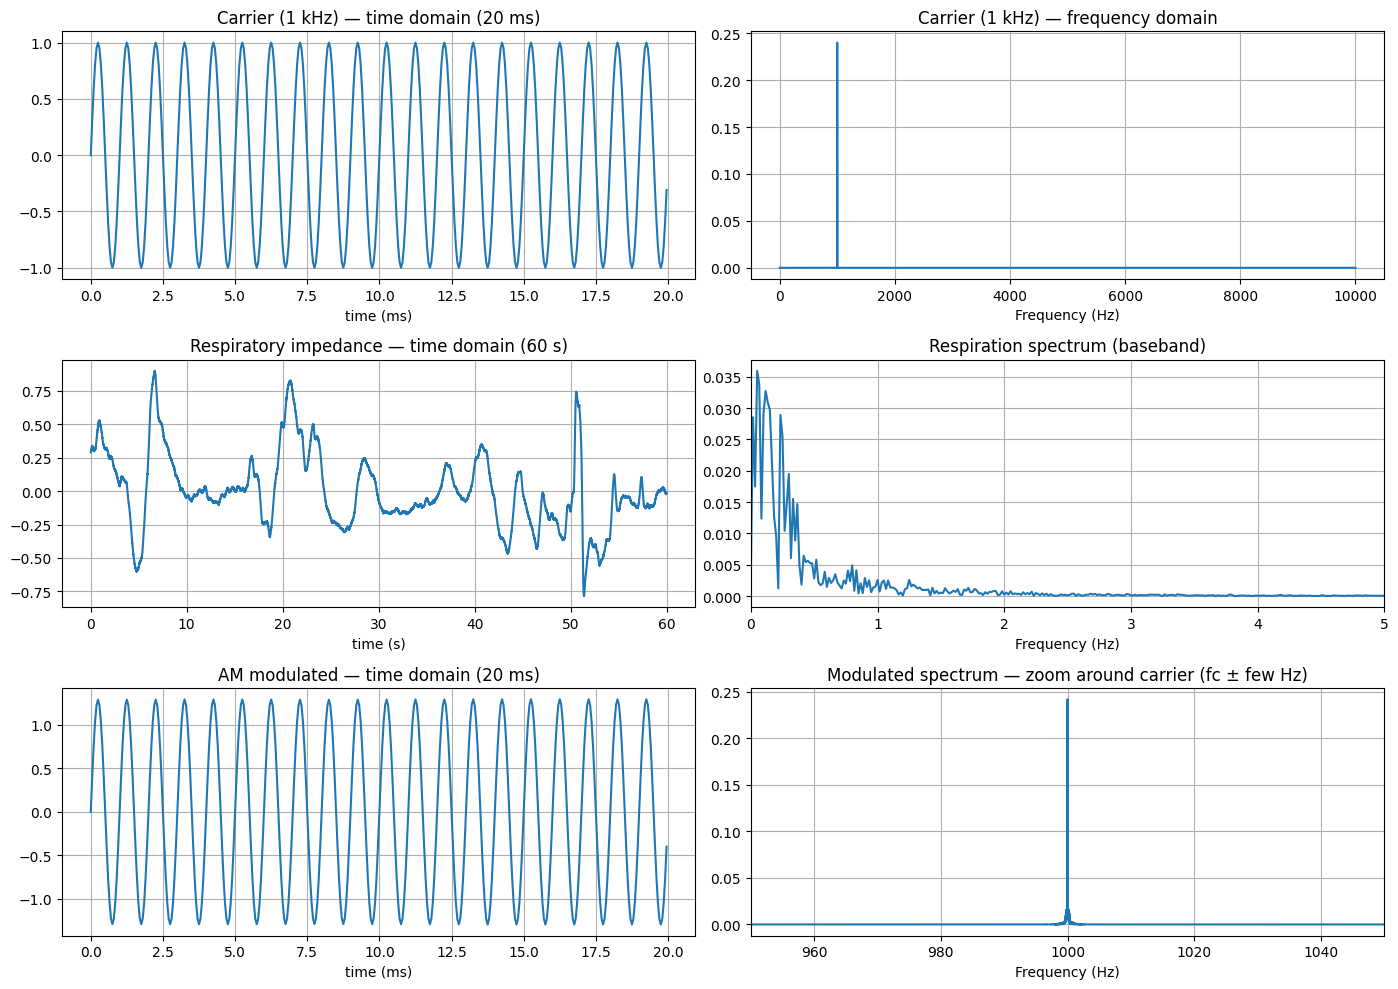

In [12]:
# Plot 3x2 subplot: time domain (top row), frequency domain (bottom row)
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.45)

# Time domain plots: carrier (short segment), resp (downsampled for plotting), modulated
# choose a short window for carrier time plot to see oscillations
n_plot = int(0.02 * carrier_fs)  # 20 ms
axs[0,0].plot(t_new[:n_plot]*1000, carrier[:n_plot])  # ms
axs[0,0].set_title("Carrier (1 kHz) — time domain (20 ms)")
axs[0,0].set_xlabel("time (ms)")

# Respiratory (show full 60 s)
axs[1,0].plot(t_segment, resp_segment)
axs[1,0].set_title("Respiratory impedance — time domain (60 s)")
axs[1,0].set_xlabel("time (s)")

# Modulated signal (show a short window same as carrier)
axs[2,0].plot(t_new[:n_plot]*1000, modulated[:n_plot])
axs[2,0].set_title("AM modulated — time domain (20 ms)")
axs[2,0].set_xlabel("time (ms)")

axs[0,1].plot(f_car, Car_mag)  # ms
axs[0,1].set_title("Carrier (1 kHz) — frequency domain")
axs[0,1].set_xlabel("Frequency (Hz)")

# Frequency domain: show up to e.g. 2000 Hz around carrier
# Plot resp spectrum (low freq)
axs[1,1].plot(f_resp, Resp_mag)
axs[1,1].set_xlim(0, 5)  # respiration is low freq (0-2 Hz typically)
axs[1,1].set_title("Respiration spectrum (baseband)")
axs[1,1].set_xlabel("Frequency (Hz)")

# Modulated spectrum: show wide range and zoom near fc
# axs[2,1].plot(f_mod, Mod_mag)
# axs[2,1].set_xlim(0, carrier_fs/2)
# axs[2,1].set_ylim(0, np.max(Mod_mag)*1.05)
# axs[2,1].set_title("Modulated signal spectrum (full)")
# axs[2,1].set_xlabel("Frequency (Hz)")

# Zoom around carrier to show carrier + sidebands
axs[2,1].plot(f_mod, Mod_mag)
axs[2,1].set_xlim(carrier_freq-50, carrier_freq+50)  # +/- 50 Hz to clearly see sidebands for respiration
axs[2,1].set_title("Modulated spectrum — zoom around carrier (fc ± few Hz)")
axs[2,1].set_xlabel("Frequency (Hz)")

# tidy
for ax in axs.flatten():
    ax.grid(True)

plt.tight_layout()
plt.show()

## Task 3 - FitzHugh-Nagumo Model
(5 point)

Read this [Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) about how to solve higher order differential equations in SciPy.

The FitzHugh-Nagumo model is described by the following system of differential equations:

$$
\dot{V} = V - \frac{V^3}{3} - W + I
$$

$$
\dot{W} = 0.08(V + a - bW)
$$

where:
- \( V \) is the membrane potential
- \( W \) is a recovery variable
- \( I \) is the magnitude of the stimulus current

a)	Solve the differential equation using ode. Find parameters a,b,I,V0,W0 resulting in a spike train (you can find some examples on [Wikipedia](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model)). Plot the timeline and the phase plot obtained. You should get something similar: Do not forget to paste your code too![FitzHugh.png]({sig}48/KYmzrGPPpO4yguJq/YgcZUfbYur+qQVe3vx78vbDLlImpszBcDpwBCsbpoShhnLoNCAndj4nkWEoOt4vb69anOmQu3XYsRN6eYOp3BpXkt0LyogtXlZCG0P4uBzcQeG2KNH8kfX4jpggPid52nMGCmTIAhCi5C4xotP+PxkOSZlNkDLhqMx5DpTQ3+pKBbcby/BwS4CzA1roEjT7TjLxFX9hBytEfYRYW+XYFLl7MhqWgAG/U9j3X0PqfB3nNn/t2JFs0JMcrNDaLcTUy/G43A2l2vw2NUOFXKbwqREGXT5bxO6VyyPKiyi8cD6I6Vph8rD9uG6wxe4BoeBL6ONy+ZMW+Qwi2iQU1wbNRLXC5G4ygeJq/aIOutRlyMxco24BgYCFy4AJUoA06dLmTLAj15LeuIKRLz5H27MrYiiaQQYFG2FCjOv4+a1jTg+vSHKsS9NnnqT0XXHC7y1u4sLc1ugT2YBKVi+UKgD8s1/iNuOcQi8eoCuxbV/f7GO8zRlipRJEAShRbi4pkz594tlJK4q/PHVajc2VBVQumprmC98D5vvMYwd/vglAp/OTcUqdp805u1RauhZvGTiqtosUduE2SLs3TJM+CcbLNMXQ8nZT3DAKqYdl5hKR5zFrvZlUVPICqHDLky95CKV/Z2I9yfwZmllVMyfUhVITVKbqH5Gn3Ijp0UXjD/0EvdD2cuMRVz37t2rus/OnTulnF8Rj/vRHtoWV/WXX7++uF7Ije9VoiNIXLWHPoir+vf50iXx/c6dK2XoALnEddgwoFQp4MEDIFyDCy//1r6NHDkSadKkSXLiyuON68v/YVVtY5TnR7GZZkfmrJmRPUNKmLAvjVHK9EidJRdy5zFHjnQCzFieIFRGmY5bsdc/DDq8tqcoSFwJgtA3Hj0SxVW9HxNdqCRxlQj7/gaOh3phVMc6yFmxH3pteIirn6XCP/iCT+fnYmWnSqiTqzBqjD6AhQ+DYt9Q4q8iJpb/7VYidipx/bdiNhTNWBLVlr7BcZuYVgXxFUPXcKhzBTRSietuTImHuHrd34Az/QXkScE7GNlh0WQ8uo+dg9nzZmPWrFmYNXseZs+YgkX/Nkbr0jlZ5yQzcvfZjkkPAxEei7keOXIEBgYGqF69OiZNmoQxY8aopsdNnz4dLi5xf30JRY4R13fvgNmzxatHmzcD/jocTNA3ceWH6PNO144dUgbjr1UwgejLiGtYGL/gBIwdC0ybJl4d1RVyiWvTpmACCXhIE1o0+R0KCAjAypUrMWDAAIwePVqVxo0bx+rPv7C0tETWrFnx5s0b6dZJh9AgZ3w8uRZ7R9ZG11JRFzWjSzkhlBuMPkP24/Q1e/DreuLmgvw/+o2uxbVLl5/iOnWqlEkQBKFFnj4FMmQAihQBVq+OeZYiiWsUwV8Q8WEztnQthUI8qJafgEYrbsPF+TO+uTrDyemzKrl/t4XVw51YVT+VauqTYFwPXTfcwPFPfnD65ATXz5/Y7cTk6PgFzp+94BsSptq64q/wXlGoLwK83Nj9neDIemf8J0+fPjni02dnuHhHIDTgo0pcJ1bS/ojr1wdbcHJYBlSzMEKxpoMxlcmJXbSGfgcP1nREo5TsMyk2GOXnP8Y3fphrDBw/fhyGhoaq4Jw+fXqkS5dO9e9ChQrhNd8NRcvIIa5cmnjg375dymBoS57+hr6JK5dIPj2bSyXzA0RocbcXfRFXvrtosWJA8eJSBkNX32e5xJXvrpo9O+DgIGVokO/fv6NevXqqdo+3f+qJ55mbm8PKykq6dRJB/fvgdBm2G5ugaWVLpM2UA7lz5xaTOft3jqxI0+hfVFlrgy+yTFNKWuhaXCdNEuMFb9f4vwmCILTNixdivOXtDu9LPnkiFfwGiauKz3B7uw3LKxRS7XxowJJgmhGpsuRGAQsLFChgAQv2k6cClhbIlzc7sjBBM+W3E1IhbfY8yFWgoHhb1e3ysZQH2TM3QplKy7DdyhVx2og3jEVwm124sqQjCloWQHbzPD+eN2/OrChUsgJqz7uNnQ+sEPFuCWZWz6n1Na5hgUy83T7ik90H2H92ZzIqXRWPBtfbq7Crg4B8qaohf/3/cNY/OMY1v/v371cFZj5q6+7uzgTyI6ytrWFra4vgYO33ZOQQ1927xQqoo2W8v6Bv4spHB/mmOm3bgsnBzxEzbaAv4sqrZfnyQJkyQEi8zoLWPMlBXMPDw9n7+KRq9z58+KBKDuyJPn/+jI4dO6ou6L169Uq6dRIkLACh3p/x+ZMdbD7aws7OTkysjefJ5vNXfPIK1fujb6JD1+LK6/eJE2J7zqfLEwRBaBt1cWVeimfPpILfIHFVwXcVnoNB7NPKyhIPGJpJ6VkagjmPHBHTkbC/EMas8Pl87B9s+dvj/EwmPY9i9k1mW+7/YXXdAnHbVfjJTIxKwK7CkTGOUkWqXVj/+S/vl0y6hwsoblACucqsxD4mrjGN7Uatcd3N7S4akvoaVw6fVsneomqasK7RJ3FV/+rUrSs2gNpcX6xP4vrPP0C5cuKmRbokqYvr39q3UaNGJdE1rlEkov3W1TC+gtCVuKp/9HZ24jFQgwdLGQRBEFqEi2u2bGJ/KmtWpkPPpYLfIHFV8QkurzdjfolCqGmWBpnYJ5eFpWwJTllYyoQ0ZjVRuOQCbHnzhT1DHAhn4vr+P1yY3xI5c2RH6vSZfjxm5nSpYF6gGP6ZegVb3rFeeOQF7G9bUovnuPLbhCLY3wteX1zh+tUHnn4h7PHVpfVXvj7cjOO9BBQyq4i8NTfhOBPXb1LZ7+jDcTgkrrqncWOgQAH23RRP2dAKJK7ykxxGXGMjaR6Hk1CCEeznAw9XH/gFhalm9Oi7uup6xJXDO418fffQoVIGQRCEFiFxjRchCAv0hLvNB9i9tcI7a2vV9K3EpXewemuHDzbu8AwKVR0P81f4EGewJ3y/Oqoew+rdux+P9+6dFd5/{sig}tawB8EYSI8Bc4N6o8OqYyZn/kwRi07Tm4g4mbW6iF/a/P4b2rMVoVESBkLYSmmz/jTAyDs7/Ce6bP8HDraIzKXQzFqs9Cj/Uv4BLt0fD8+cLx+epibKkjIGeuZijY6xgeBIawVxo9JK7yQuIqZWgBElf5IXHVNTFfwPyFmG70S/413F6zFN2KzcbWazb4wHL0ffqwksSVb8YWBQ2GEwShLUhc44EsjfFfn0Qsj+tLiQh3h9WG1phSPgX7I5dG/narMOuuG1ylchXhjnC6tBhT2+ZDNiEVUpm3xoTb3/H0h0XH9mxcgV3wdFMfjOTHGgi5kK3DChz4AviIN/iViId4sKETmuYQkPqfkai/9A2cgmNaDUviKjckrlKGhlCvzmvXin/ngwelDB1A4qodSFx/R+2LH+nFQsR1nNq/BQsWL1PtkLxy+RIsX7MVi/c8wc0PfEd7iT/i33e4Pb6MS4vmYPu8VmhZoiZSC10w8ehLsL4LiasCxJV/9fgxbiVL8tcDfItp+hRBEIQG4LsK8+NweH+KCyyJazIjMiICIXcX4OAIS2QxY2JpXA2Zm27G4TcOcI0Mh5e7C3B7LnYMLaEKgIJQDcVrbsaR736qKcVRRIaFIDzQG97fveDp5Y/AsEiEq/UxPB9twukhBijOniNtofrotNsdl2yCEeTjAU9PD3j4BOK7qwMirk7G8m6FIBikQY7e2zD9ZjBCYjkOh8RVXkhcpQwNwvviPC1bJnbwzpyRCnTAnTuAiQmJq6Yhcf0T3qpH8NlB9ufhvKMtKluIZ3z/TGYQzIeh/bKbeBca8cusmwj2JQoNcoB/0GnsHlQX9X/cpyDSZp+EBdc/qmYOkbjqXlz5SUy5cokxjLct/CxjgiAIbcEPFClaVGxzaMQ1GSJu7uEIm0vzMLmEgNyGLPib5EGeIiVQqlxZlCpVEuUK5UB2LrXsW5Cr+SKMPhkG56BfZTLc6RbsdnZHtzrNUb3tAmx9HwT7X3oN1nC3nodJhdKqjgkyMS+F3EXLomzpUuw5WCrNnqtEMZTLZYTUGQpAKDgOE4+/gR27Z0QsI7okrvJC4iplaBBXV6BRI6B7d4CfWsKPi9EVN26I3zX1oyv+GORKJCSu8qFocQ30RuDN2fhvVCUUMU+jasf/TCYQCnRDpTGXcN3p5xwdryvTcGhELlT7xwIZTaQd/JnoZq00Fv9edMMrL/FLq+GvbpJDaeLKpww/eiQVEARBaAF+GgSPtZ06AalTx9zmkLgmWcTQHuT5Es8398fEWumR/0enQT2lRb4GgzDx8Ds8YP0Hcafgn92CMOsjeDUjH3ILKSFk6IqJj/zx+pdDZ/m84vd4vGkOZtcsirIG0T0HS0aFkKbORIxa9wTPXQNU94yt80HiKi8krlKGBnF0FKe1tGghZTA0LYtxhR/9M24cMGaMeAyTZ0znUCUCElf5ULK4hny3xpvFVdGX75vAGjjToo1QrdNYDBo8FCNHjcbgPp3Rp0o65MycnclrD8y8YY8XHh74cHIDNnQzR/W0UszIWAyFWo1H5+5zsWbfHTwJZ98r1TPou7YqZ6ow31WYxzDWR8Tjx1IBQRCEhlHvO02dKvYlHz6UMn6DxDUp8+MP7YmX/w3G7PIC8mVKBaOUaVVHKRiziFOkfg+Mvga88eW3+7NDEG5/Ee/X1EVtyzLIU2k8lr0OxHv1pak/7hIG92f/w44mGVA9p5H0HGmR1sQAqbPlgdBxK0acVDv85i99DxJXeSFxlTI0iJMTYG4OtGkjZegI9QZ/yBDAyEhcK6JpSFzlQ7niGgRft6vY3zkfGvLZPKkyot6CO9irflB5iBv8T/TAv7VNYWBkirpLjmHCirWYX1pA8dRcWk1hamyIakPWYckbQBWaiF9QgrjyWSRR0/YyZiRxJQhCHvgFeD4oQOKarIlE0DdHuLx+gOePH+Hho8csyDzGwwf38fKdHT75sU5nDCIZGeyFQFcrWD1/hWevHfAlIAKB0W0czAgP8sA368ewevrwx3M8fvQAj58+w32bb3D0ivvKJBJXeSFxlTI0iFLEVR0urnw9WkwHdycGElf5UK64usHLaReWlciE4mkKw6jzJmx/+FXczf4H7MsRdhLHJzRCPdYAmmfPjzSZ0yIj+3fqqgNQb951XLt1H/Yu3+DKvlPEnyhBXENCxPjYubPYrvP2nSAIQtuQuBIS0RxfEOO8xj/z4zMFMi43JXGVFxJXKUODKFVc+Xq0mDY1SAxKElc+TZt5HVq3ljIY2pimTeL6O0747rgZc/OkQ4H0tWD87yNcd/CXyqL+Bnx5iR2ebB6KkXxTP9YICma5UaxVX/Td9hAn+AYIPxD/aFr408WTOB7vEyOafQe6Flf1ujR7NmBsLG4ARxAEoW1IXAlFQuIqLySuUoYGIXHVHfyzt7QUxTL0lzX5moXE9Xec8f3TViywSI+C6asgxYirOP9e7dgbFXzmjQfe7B+NOaUEZBTywLLpImxkf7Mv4g1khBtYJCJCgxESGICAAPXkj8Agls9ebtznCsVCZAR7niAE/fE8LAWGIDhU3K4wLoqrhBHXKPhO5XwWBz9yiyAIQttEiSttzkQoCl2La8uWYjB2dxd/51eYNT1iQ+Kqe0hcNYeSxJXL6rt34ve6Zk3tjQaRuP5OPMR173DMKSsgbe72qDr2HJ6xbC1eY/iDn+15EOxOzMfWrmXQpHZVVKhSHdWqVcM/ZUui/cgFWPMWcFHNdRbvEK8woH5j/4/wPTMck/o0QOnyldlzVEf1KhVQtU4TlOm6DQtPO+DHzOi/BBsSV4Ig9JXRo8VdhT98kDIY6k0miSuhE3Qtrlu3Al26AOvWAa9eSZkahsRV95C4ag6liKt6AFuzRqxjBw5IGRqGxPV34iqu3/B691DMKicgTfEhqDP7Hj6x3Bi2T9AC4pckLNABTrfWYE3HAqga3Y746Quh0ph92PbwOz7zGc6x+2QM+OPr69u4t2EEFrVKi6zRPY9BVRTssg5r7zjBMVAc343tqZQkrhMmAKam2mlTCIIgfodfLDMwAKZMib5/TuJK6ARdiyvHxkZcJ9ejh5ShYUhcdQ+Jq+ZQ0ohrFCtWiHXs+HEpQ8OQuP5OdOL685xWEVFc30SJa5H+qDX9JviqDFHZtE+k6tw3Xzjd24DV1QxQOhUXSCMYpjCGsbGUUhipYhBPFUbuw9IX7B7xHhIORqDnPRztVxRts/DHSgHBUO05VM9jCCP+PKnKwqjmWmx+4KTaSTkillFXJY64Xr8uZRAEQWgRvq6ex3We+LK+3yFxJXSCEsTV1lacjhBdxdAEJK66h8RVc5C4yofyxTUdLDPWhPG/j3HHTSr6hXA4HR+LJRUFpC0+DPUXPGcqG0f+Mo02LkSGRyDyzWacnF4JRdJwoSwK00qTsfTIGVx68hg3Lp3Fs8198G/TbKo4JBh2QO0+F3AzKDh+x/O43IDN7k5obikgZdYCyNVrBxbtvIxHd2/i+rXruPPwIs4cXoTJ/xijCH+etMVQedopbH0dhtDwpCGuc+aIdSx/fmDRIimTIAhCS6iLK58Z+TskroROUIK48jVy/Hy63r2lDA1D4qp7SFw1B4mrfChbXLdhgWVmFE1RAEZNZ2LKmt24dOYEjh49ytJxHDt+BCfP7MCqUY3RKb8As5z1UbzDHKxn5YdPn8Bx1e2i0hGWDuPQwfPsb/gCVq6+4OO3iVXXiFBPfNrRCbNrmrDvRy6YVJmCHjveqaYr/8D3Fp7vGIAGpTKy22RDloJDsMTaD/HpCnndWYmTvTIgq2ACo9IDMeBGIGz/mA9tj3fbu2FCBYHdjslr3UVot9cNwWExT5xWorjy1Ly5lEkQBKEl1MWVOeofkLgSOoHEVV5IXKUMDULiqntIXOWGiavTf1hQNBfKsQ9eNVqpkZQPRsbDMePie1izZ0nclOIwhAW/xsXx5dE5oyl77D7ot/kRXrAS9hX+hXCHG7BbUw118gowyFUBnfZ54lqctj7mr/ArXu8dipnF+ZE/dVGuwx5cYLnfVeXq8MWzz/FgXW/0EYxgXHkK6mx5r9plOCaUJK4LF/7sREY3+kEQBKFJSFwJRULiKi8krlKGBiFx1T0krnLjBE/HDZieIzUs2Qf/q3wmJpmx1ANjTr3FG/YsiRNXb4SGXsauVkVQR8gAIf9MTDpuDb6BvEoV1acif3uG8GNd0Ly4AYRMxVB1uTWOq+1kGSORfqwSXMLJKY3Q2MwIeeoswaBdTtFIqxoeH/Du7Hmcv2ON+46+CI9IGlOFvzCR37MHrKNII64EQWgfEldCkZC4yguJq5ShQUhcdQ+Jq9x8g9/XSzg0uDdG16qHpsxkeGqe4NSMpUZoUK8fWrfdjL3PnPGZPUvMY5FxwRkhHjuxtGo+FBVyQ6i/EQsuO0Yvw75vgdvj0atiRgipLZFz3FVse+IvFcZCyDfAbi3W9ygBcyENyk69ifV8qDjsM1xf3MLV4ydw9swZnD59AqfPXsSxa3awimaRb0zLeZUirlGvL4L9QQoXBho0EH8nCILQFiSuhCIhcZUXElcpQ4OQuOoeEle5iWQyo+WkepZEEPYBwW8WY3z5rMhkUghCr+PYdD+GBiDcHrBZhZm18yC7EZPcLvux4Fq0u039SuAX4ME0zG7N7mOcDrUWP8fhD77Ax1VY1Lwk8rEvpWonYZ6MM0AoNB5dVj0AazLiJOVKGnHlfGPSzdvRRo2kDIIgCC1B4kooEhJXeRk/XnwtDx5IGQzWR9QoJK66h8RVs5C4/oaG24xoSexzhL1H8OtFGF02M/JkLAXLmY9w2CqmL6w7EHAEm5oWQXkDcwid9mLuVVepLBYCmLjem4rZ7S3Z9y8FKrUejI59B6F55RziBkx/pPQwzNYOTTvvwamPnvBiDyFOW+b/+ZNt27ap7sc3sIoOLvhyQuJKEIRc/BTXSAwYIGWqMXDgQGTIkIHElZAXEld54a+FT/Navx6ssmteWjkkrrqHxFWzkLgmQaQR19FlMqFItgqosfI9znyMaZyTK+Rl7GlVCnWFnBC67MPceIy4zu9aXBXHzDOnQeaceSFkLo1CFWqhUeOGrL1tgAaNmqBhvZpoVi4TchhmYbdthGbrruNEAJ9+G3MjzEda+eMOHz4c169fx+nTp1USe/nyZfj6xuvAHo3AxdXCAmjaVMpgyOzOBEHoCdOmRYkrULeuE86ePYWLF4/jwoUL7OdF1KhRA9myZcOHD3HZkEB+SFyTKSSu8sM7HyVKAPXqiWuWNA2Jq+4hcdUsJK5JEDVxLZS1HCottcIpmzCp8Hc8WTqPnS1LomYCxHVhtxKqOMZTquKNUGm5Na7YBrEbRCI8PAz8WSP93YGHs7G2V2F2uxQQqs9Es20fEBLLrsIHDhz48bjqKW/evCxuscAlM1Ejrrw9JQiC0CZ8aRtr7qS080f7p54sLCxga2sr3UNZkLgmU5KruKpfhT5yRKx4q1dLGToi6jWFhoqdDy4fJK6Jh8RV92hDXNXrMP/bGhuDBUgpQyZIXBNBqDWCXy5QTRXOlrY40o29jl3P+emw0eHCGoedWNnQEkX4VOGOezDnCpPSv8GnCt+djLntLdj3LwVMqvZHx2VXccMhHFxb/yDyGR5s6YEOuVmny7gZinc7igfBYYipGu3cKXbWevXqhYMHD2L79u3YuHGj6t9eXnyUWF48PIDSpQEjI/FInCdPpAKCIAgNY28vzg7MnJm3Ozb43//+w549W7Br1y7s3r0bFSpUQI4cOWBjYyPdQ1mQuCZTkvOIa3g4wGcwLF0K1KgBnDkjFegY3t8pWhSoVYvEVRPom7hyypcXR+0DAqQMHaOtEVc+G/P+faBfP3HU1TUOyx41CYlrYrBDyMfVmF4xJ3IIBSC034uVt2KQ0eCPwIt5GFc9B9KY5INRn+NYfptZ2t8IdGOVbB6WdCwAY6M0KDHpGtbxc3wkoptG63R1IbbVE5BLqIACNdbhcHAoYhrbjVrjeoRf/YwGude4cnEtU0asazzx2UQEQRCaJqpp4xfKLSwio+1f0RpXQickZ3H19haDfJ06yungc0hcNYu+iSsPKFxcS5ZM/lOF+cWmlCmBxYulDJkhcU0M7ggJOIoNtS1RQcgBodIyzDz3EaxZ/vNIHK8XwMUhaFsmDYT0RVB81kPsex0iFcZC+HfAbRe2D6iIckxcWy64j//ZSWUx8PXeGhzrKcDCqDIK1N6ME0xcY2qWlLarcNSIa5S4xuDTBEEQGoFfLM6bN/qzo2lXYUInJHdxzZMHqFJFymDIfIE8WkhcNYs+ieu1a+K29Hy3v+vXgbCYlgzKjLbElW/myh+XP34UctZhEtfE4I/Q0Ls41KMYmgipIaT7F+MOv4MzK1H9CdX/kN+eIXh/CzQrIkDIWgwNNjjhrL1UFit8g6QLODG+PhoJZsjd6zD+vfVTi388hdpTud5ail1NBOQVysOieuwjrkoTVz76wet9p05ivaARV4IgtAmJK6E4kru4ckGsWVM7gphQSFw1ixvrdWbNGn3Dqiu0Ja4LFogd1nPnpAyGEi7GaEtcT54UH5dP99cFJK6JIzzEHg/m18ZgC2P2d2yMuhOP4cC3ENWo608C4PF4Jw6OLI5iaQSkzNsIwy744GFMy2F/gY/KfsD95d0xOBWT3lI9UXneFbz7+seYLoNVlLDneLCtFwYWFGAiNECxdvtwPThMpb/RoSRxVa/nBw+K9UIhPk0QRDKFxJVQHCSu8kPiqlnc3YEsWYBmzaQMBaAtcY0SxGPHpAyFQOJKREdEWCB8To/A+o4Z2N/REEKWDig57Dwe+UaJJWsAP27B6enVkcqElQulYFFuIXZ+9VeNzMYV5wuzsaOlgFxmXF7bo9FWZzxm7cIvhHsj+NxgLG6THgYGBhAqTELdVa/hHxqd5IoobcQ1im3bxHqxc6eUQRAEoQVIXAnFQeIqPySumoOv8erbF1i4ELh7V8pUANoS15UrwTrdJK5yQeKaOCJ5A+d1Gw939EZHcwFGQioI2eugSfe+6D9yJAYP6INR7SqgWl7xaIWUZSah19rP+BASpj67FxGuz/H5wgLMHTsd4+YdwkXnMLiptZ2RPrfw/kwndM8oIL3ApLRUJ9TtOBAjhw1mf8OBGDR0BAb06Yre1dIjnyEf/a2Kfxacw/YvIew1xjxlQaniunXrn/VNCTMvCIJIXpC4EoqDxFV+SFw1R69eYgfu40cpg6GEDhyJq2YgcU3qiJXRy/Y8zg0tg/aWAkzZH5THnN9Teouy6LbhLo6xjhLfET7qvpwwqwN4Pr0AcgkZIeQdgFkvQ/Dul/XdvggLvYMjfTuhV+a0yG0c/XMIQloI6RqhcpU12PvSVbW2VdUEx9BmKFVct28X68W0aWLHUvy8CIIgNAuJK6E4SFzlh8RVcwwdCqRODbx4IWUoBBJXzUDimtSJMsJAhAa9wuWZjdEvOx95/VUo05dqgq4HvHDXRbr5byIZZn0EL+eUQCGzXEhVdDjmvw7B+1/ElTWkkWGIYAL36dom7O8soES6X59DEMwg1FqArtteI8A3OOpeMTmrCqWKKwvb7HWJibetPNYRBEFoGhJXQnGQuMqPNsRVfZSR97F5h4ZLnVLQprhqQxATC4mrZiBxTQb8aJsi8P3NZTzcsxRb1q/GitVrsGbNGqxctgT/O34Vd9wBX9Vt/1TJiO+28Hh6EPu37sK2A7fx1CMc39Xazl9mWQQ5wf3OGhz733IsWyk+x5qVy7F64zYsOW/D5FhtePIv0zOUKq785fB6wRM/HofHFIIgCE1D4kooDhJX+dHmiCt/7EOHxM4MlwmlQOKqGUhc5YXEVW4io9HWmOQymvx4rBOIyy2VKq7nzwPFiol1o1IlEleCILRDlLi2bCllqEHiSugEElf50aa4du4MlCkDWFlJGQqBxFUzkLjKC4mrfqNUceXwY8CqVhVjyffvUiZBEIQG4eKaJ0/05+STuBI6gcRVfrQprtWrA9mzA4GB4u9K2KiIQ+KqGUhc5YXEVb9Roriqt+mNGgGFCpG4EgShHfgFMt5fZX6KyZOBDx+kAgaJK6ETSFzlR5viygXRwkI821RJkLhqBhJXeSFx1W+UPOLKBbZOHaBIERJXgiC0A+9LlisnxmGeDh+WChgkroROIHGVHxJXzUHiqgxIXInkCIkrQRD6DO9Lli37U1xPnJAKGCSuhE4gcZUfElfNQeKqDEhcieSI0sW1dm2gRImf04fVpxETBEEkFnVxNTQUY3IUJK6ETiBxlR8SV81B4qoMSFyJ5EhSGHHlG6fwr6eSYhxBEMkDEldCcZC4yg+Jq+YgcVUGJK5EckTp4tqwoVg/WN+RvVapgCAIQkOQuBKKg8RVfkhcNQeJqzIgcSWSI0oXV14/mjUT68i0aVIBQRCEhiBxJRQHiav8kLhqDhJXZUDiSiRHlCqu6mtZHz8GjI1JXAmC0DwkroTiIHGVHxJXzUHiqgxIXInkiJJHXKO4fZvElSAI7UDi{sig}OElf5IXHVHCSuyoDElUiOJAVxvX4dSJGCxJUgCM1D4kooDhJX+SFx1RwkrsqAxJVIjiQlcZ0+XcogCILQECSuhOIgcZUfElfNQeKqDEhcieRIUhLXhQulDAad50oQhCYgcSUUB4mr/JC4ag4SV2VA4kokR5KCuN66BaRMCVStChw4IMY9giAITUDi{sig}OElf5IXHVHCSuyoDElUiOJAVxvXcPSJdOrCdZsojxlCAIQhOQuBKKg8RVfkhcNQeJqzIgcSWSI0llxJXXEZ5y5gSsraUCgiCIRELi{sig}OElf5IXHVHCSuyoDElUiOJAVxtbcHxo4F60AC2bPTiCtBEJqDxJVQHCSu8kPiqjlIXJUBiSuRHFG6uKpvwjR4sDhl+O1bKYMgCCKRqIsr73uQuBI6h8RVfkhcNQeJqzIgcSWSI0lhxDUK9lUlcSUIQqPwvmS5cmIc5uniRamA0aMHiSuhA0hc5YfEVXOQuCoDElciOZKUxLVfPyBDBsDBQcogCIJIJG5uQPHiYn+mVy9gyRJxQzhOv34kroQOIHGVHxJXzUHiqgxIXInkSFIS1/79wb6rwLNnUgZBEEQicXUF8uYFunYVf69fHyhVCggNBUaMIHEldACJq/yQuGoOEldlQOJKJEeSkriOHi3WlUKFgLVrpUyCIIhEECWu3bqJv9erB5QoQeJK6BASV/khcdUcJK7KgMSVSI4kJXGdMEGsKzz16CFlEgRBJIIoce3cWfy9YUOgfHlRXIcPJ3EldACJq/yQuGoOEldlQOJKJEeSkrj+++9PceXtD0EQRGIhcSW0gvqW+CJ/ZMQIiav8kLhqDhJXZUDiSiRHkpK48jaH1xWehg2TMgmCIBIBiSuhWX74qT883j/Cy5Nn8dTGC5/8pew4kBzFNUrkecWytAT++YfEVdeQuCYc9QtTq1eLHdNDh6QMhaBJcVV/v+fOiY+7YIGUITMkrvpNUhLXPXuAKlXE+qI+4vrnhW2CIIi4QeJKaAFuqfdwamwD9DRKhy5LnmKHvVgSF2jEVX5IXDUHjbgqAxpxJZIjSUlcOfYs9mfL9rOTSRAEkRhIXAkNEKk2ETgIod8v4Gi/BmhlJiCHYWo0XPIMO+2k4jiQXMWVj0g1by529F+9UtZVZxJXzaEv4so/twEDxMRHIT08pAKFoGlx5UFx0iSgSxfg6FHg82epQGZIXPWbpCauvN3ns4xSpAA6dgRev5YKCIIgEgCJK6E5wl3w1eEwDi/ugsYssJqyJGTMgYarXmI/jbhi/HixI/3ggZTBUIq8krgmDvW/IxdXIyPg6VMpQyFoWlwdHABTU6BlSymDoaSLMZoW16AgoGBBoFgxKYOhi/dL4qrfJDVx/fQJKFJErIs88YtcBEEQCYXEldAQLqwnuwGL25aDJYtORizx4GqaITuakLiqmDlTFJqrV6UMBUHiqjm4uKZMmfxHXHmHNGdOoG1bKUNhaFpcg4OBihXFAMklVleQuOo3SVFcCxcW66KZGXDlilRAEASRAEhciUTgjZCAe7gwewJm1K+KdjVzIZ2QFsZCLrTqVB9FimWBUeosaLTiBYkrg8RVylAImhbXDx+Anj2BMWOACxcAHx+pQCGQuCYOEldCCSTFNa5Zs/4UVyXGP4Igkg4krkQi+IJA711YUDgdirKoJKQvjqzFu6FH94k4t3c8ujUvBMEsExose07iytAncVWfQtmgAWBuDri5SRkKQdPieuOG2Dnjh+5HoaSpsySuiYPElVACSU1cebvfrx+QOjVgYgJcuiQVEARBJAASVyIRuCHQ5wCWlc6KOunLoPzCVzj2kWUHOgF3JmFik5wQTDOhPomrCn0dceWNSu7cyV9c794V13yqi6uSIHFNHCSuhBJIauIaxfz54u7jZ85IGQRBEAmAxJVIBEEIC3HAu3NHcPXoJVyyDYWnKv8b8HAypjTNQeKqhr6JK9+EqkcPYNo04PJlseOvJEhcEweJq24gcdVvkpK4qs84WbVKFNdbt6QMhpJmpBAEkTQgcSUSTIxBx/8zcG8yJiZSXLdt2yblyA+Ja+Lhfz4uDur9KyV1VEhcEweJq24YOnQoiasek1RHXJctE+sjH3l1dtb8zB6CIPQDEldC8yRSXPfu3asKzDxAR0ekDPZD4pp4du8WOypbtkgZCoPENXGQuOqGYcOGkbjqMUlVXDdsEOsjT7zNCAmRCgiCIOIBiSuhRiT7X9zR1ojr0aNHYWBgwESqKDp16sSCXFv2xWyIPn36wJ5vUSgDJK6Jh8RVWZC4Jg45xdXPzw+TJk1C/fr10aZNG1Vq164dOnTogCxZsiB79ux48+aNdGtCn0iq4rpy5U9xrV2bxJUgiPgR5Rw8FvO+W8eO4u8krvpOiA9CPGxh9foFHj56gqdPn4rpCfs3Sy9snGHnGYaQsFjsJpHiepz1NA0NDWFmZsa+nAWQP39+1Rfxn3/+gZWVlXQr7ULimnhIXJUFiWvikFNcvb29VRfsMmTIoGr/eLKwsFAlLi052Qf/9u1b6daEPpFUxfXoUaB4cbFO8p3mSVwJgogvvr7AuXNAlixAt25iHomrvuN6Fa77e6N6qTwQDM2QPn16VUqbykyVLDrORb9j3/HFV3viGrXGdQXveTJ4J87T05PJlRfCw8NVedqGxDXxkLgqCxLXxCGnuEawSujj46Nq975//65K/v7+7DUEszapN9KlS4dXr15Jtyb0iaQqrpwvX4CSJYFKlUhcCYKIP0uWiHGdJ96n4ZC46jtOJ+C8oTaypBBUwfGPVHEoGuz4Bicv7Ylr1BrXnTt3Sjm/QmtcNQ+Ja+IhcVUWSVVc/9a+jRgxgv0d09AaVz0lKYqr+le6QgWgWjXpF4YM4ZwgiGTC5Mk/xXXYMDGPxFXfcb+Lr6fGoV2jqshjURglS5ZUpeJFC6tSjWFrMfGiN9z9Yxn51NCIKx2HIx8kromHH//D/77jxkkZCoPENXHIOeIaG3Qcjn6TlEdcAwNFcS1SBHj6VLf1iCCIpMfs2T/FlYVCFSSu+k5EMCKCfPHd0wNfv32Dh4eHKn1j/+bJw8cfPsERCI+I5TIpiWu0kLgqC02L65Mn4vsdNUrKUBgkromDxFV/0cagYEyP+bfnSuriWq+eWC/ZVxh79kgFBEEQcWDOHLH94KlvXzGPxFXPiU+AjvG2JK7RQuKqLDQprnxWO5+2ws8ofPRIylQYJK6Jg8Q1+fBzemo43B8cwMXFQzFtwhiMGD0OY8eOxchhgzBv40GccmJto+q24h3iEx+jR+1xgm0R8no3Fk4fiylrDuC4DeDOxO5vJHVx5etbeb3kiR+RQxAEERvqywmixLV/f+DZM7G/Wq6c2H/lTJjQk/XdSVyJ+ELiGi36Jq5794oNjA7/jLGiSXGtUgXIkePnhiNKXLdF4po4SFyTC1GV8zv8XK/h6Jiq6JD2z/0cjC2qo+WG97hgFwHN7yPEvkAv/sOtKf8gLXsuw9KdMeAiYO0tFcdCUhZXXm/69QMMDcW6qdSLmgRBKAu+L6uLC9C1q9iPifJSnt+9u9if4/32zp17IkuWTPjwgcSViA8krtGiD+KqLmwHD4qdk3XrpAyFoUlx5cc7WFgAHh5ShgIhcU0cJK7JBd5IheOb1REc6JQLDXP8Ka1RySxjDjRfeAk7HYHQMPHeiYfZqfdxHBrfHNUNBBiw58lZfyBGsLjwwUe6SSwkZXHl8YHHl82bxbq5apVUQBAEEQv82PIyZcR2gx+F8+KFmM/bFC6vp08DBQvy8p7Inz8TbG1JXIn44M96tLdGY1TNlOxLZIRK855gp61UFgdIXOVHkyOuvFPPOyZ8ree8eYBSj5vUpLjyNRaaXC+rDUhcEweJa/JAtWuz6zncXNMGDbJwQc0MwaIDek2cgTkrV2LhnJlYNaweWpY0UcUhId9wtJvzFi+DQxEqPUbCEK/qhX5/DptNTdG7hKn4+CzlbzwEo64lb3FVv6h58aJYN3mciEK9nCAIQh2+mZuZmdhuZMv2Zz/m8WOxjItrgQIkrkR8CfzCvmWLsbhPJeQpUg7dt77FaSepLA6QuMqPJsX1+3dRaPj02SiU2CkhcU0cJK66gcQ1cUSE+cHjSH+sbJmafT9SMjHtg+pTb+G1upW6HMC1RU2QKxOX10LIVWI6Njv7gX3lE4zYBLri0911mFvRDP9kEJAiDb+4y8S1weBkL67q8DrJ6+akSYCvb+JjDkEQyRs+wpo9u9huZMokrm9V59YtsX/DxdXCgsSViC+RYaxn5wUvN2c4fvoMd58Q+MdjmhWJq/xoUlz5YxUqBNSsKWUoFBLXxEHiqhtIXBNDJMJCPuDWzKroa86ltC3azL+Ii+GAv3SLKPxeH8P16WVQIYsAk7y10P+UN+54SoXxQlRW1X9frcLZCVWQhclwndoNMXp8a6RLJSBHzb56Ja7nzgEpUoj1k7fDbm5SAUEQRDSoiys/L5+f4qAOiSuRCNSC9C/8mRMTJK7yo2lx5ef0aeKxtAmJa+IgcdUNJK6JwQ+hIbewv3NRNBTSQMgyGf8etYYrK1E1VepTQzyeI/RQGzQrKrDbFUOdtfY4ZSeVxQPVI0YwI3W5iP3jKqJFuTzI03wDFq9chxtbuyJ3egGZqvXRK3E9dUqsmzzlzQt8/iwVEARBSKg3xzY24kgrHxTha+N/v9hF4krolOQsrgYGwJUrUoaCIHFNHPoorryzya+Atm4tZSgMTYsrPyOuQgWgbFkS16SLK0L8DmJNzQIoK+SEUG0VZl2wU422/nFp1fsVa6xHoGO5tBDSFkbBqXex+2WwVBhPXG7h+/a2qF4gNYQCjTH8MmD/7j48d7REwYwC0lXVL3G9cUPczI7Xz+LF2V+FXzkgCIKIBi6w/GIXH2nlywuiUBdbEldCpyQncVWvWLNni4H6wgUpQ0GQuCYOfRLXqO80X8ucLp343pWIpsRVvQ6XKiXuXMjPo9QVJK6JIPIjgt+vwJQKOZDVyBJC54NYeycGawqxBd4swqQa5siYIi+EHoex5GY8KrjqexPO0mfYnZ2B2TlMkNKyE/JMuoYPrO7g62U4bW0FiwwC0uuZuPJdQB0cgDp1gHz5xHWuHPW6RhAEweGyGrUxEx8Aig4SV0KnJLcRV97B5+fVjRkDTJ8O2MfjaCC5IHFNHPo24sqDBA8gI0cChw9LmQpDkyOu3BHnzxff79at4uirriBxTQSh1gh+tRCjy2ZGjnQlkHXibex75ScV/s4XwHMP1jQuhBIG5hA67sGcKywvTkQZWCRCbRdi18ByKCzkQ8k+OzDdKkyclvz1LBy2tEL+9PET123btqni46FDh6ScX1Htmqxg1F9e377ima7jxom7ghIEQfxOu3ZiLBfFNfr2je86LIprDxJXQn6Sm7jy42CMjX99LKX1LUhcE4e+iWufPmKHM+oQcCWiSXFduFB8rLNnpQyGruowiWsiCPuA4DeLMbpMJhTOWh5Vl7/DaRs+KhodfFj0Ina3LIXafFpxl32Yey1+uwgFfbXBjWn50KNwKhhmmIIpp2zgwPJVexU6nYZjAsR1+/btqvi4atUqBAUFwc3NDS4uLnB3d0dYmMYOm5WFAQPEesXT+PFSJkEQhBq87xzVTogjruHw9v6mavdcXV0RHOzC4rwfUqfmt+lN4krIT3ITVysrURh4Z1+pkLgmDn0T14EDgZQpxUPBlYomxXXpUvGxTp6UMnQIiWsiUBfXbOVRbYU1znyMqZHi4noJe1qVQp04i6va1YzP12GztSXq5hKQqWA1NFvnhmvqmxB9Tpi47t+/XxUfTUxMYG5ujhw5crC6mBIVK1aEjY2NdKukgbq4qq9dIwhCv1G/MMxC3o92Yt48vsfEVzRv3hCmpqaq9s/c3BSZM3eBgUE4u80wEldCfpKbuEY9Fp8WpVRIXBOHvolr1GPxLeqViibFVZOPlVhIXBNB6PsfU4XN05dE7in3ceBNgFT4O0xSfQ5gfZPCKMOnCnfagzlX47KLUCjrdX3Guz1jsLBuBuQu2xg1pxzFNW9xxesPvK7CY3c7FMggIEONQfj3gWpyshrRD+nv2bNHFR8rVKiA/v37o0ePHmjbti1Gjx6tGoFISnTr9rNDOm2alEkQBMFwcgLWrweKFRPXuHbvDjxg7WRQkDdmzpyGNm3aqNq//v3boFGjZdIRW4NIXAn5IXGVHxLXxEHiqjxIXIk/CLdBsNUyTKyYHZmNLSF0O4J199ylwt8ItQOsl2FazdzIYpSb3fYQFt2I4bbqhHkALluwtW9ZFBJMYdl3N6Zc8oS/jyeC/L7D08sHnt5+iHizHy9XNUXetALS/dMNA0/64ZFDEEICAxAYHomwGKaiR61x5SOv0aH0Na7qMNdW1SuepkyRMgmCIBg83ka1D+XKRW3iFn379uiR2CehzZkInUDiKj8kromDxFV5kLgSf/IFId57sbKaBUoKuSDUWoe5F+3BTzf6ozvk8wa4MQZdy6eHkKYg8k+8hf89j2l09icRPo7wPtEbk5tmU8Uxo4wWMC9cHuXLllGlMmXKqlL54gVQLHd6GBsKMEydAVksyyNfvsZo1W8ldtqG4lMMS2+jxJWPvCZ1vL2B3bvFPSAmTpQyGUnIvQmC0CDqdf/aNTHu8sSPz/r2TSqIhnv3SFwJHULiKj8kromDxFV5kLgSf+KL0JBr2Nu+KOoJTEjNp2LCcWs+KVgUV/Vek8dzhB3pgGbFBAiZi6LmKhuc/CiVxUKYhy1ct9bHoCqGqjgW35TSciCmvQiGVQz7LCWH43DUP2ZHRyBzZvF8ZD6I7OkpFRAEoZfwPeauXgV69gQMDIDSpcV9Jnxi2QOAjsMhdEpyE1drayBDBtqcSWmQuCYcElfdQeKaGMIRFmyFq5MroUc2E/Y37Yquq27iLiv5fSw16MMFPF/0D6rlFJAidxX0OOKFm3GYKRzh5YhvB7thcss8MDJJCVOzVKyupPkzpTJDajMjGLIvloGhIYxTpmOvpzDKNJqOVe9C8DGGEdfkIK7q8A3ezM3F+pUqFfDwoVRAEIRe4u8PVKkitgk8qa+KiGk2BokroVOSg7jyyhVVwZydASMjoEMH8XclQuKaOPRBXNUDxuDBYkDhZ6cplcTKpvr7XbNGfKyDB6UMHULimjgiQn3wZV9PLGpkxv6mGSAUH4FmS5/gl/14Pc7g3tqOKJUnFbtNHuQoOh5rHPxhKxWzb4f0808iQoMQ8u0DHN89wf0HD/DgwUMmY2rp0RM8fPwMVqeX4+TkGsiZWkCaUs3Rcf0zHLz0Fh/ef4JLQASCYmg7k7O48vaJr1UjCEL/UI+5deqIbQJP27dLmbFA4krolOQ04vrsmdiB5ruh8bU8SoXENXHoy4irhwdw6BAwciQwfLi4659S0cQoaUCAeHYrX3/Hp/orYYSZxDVxRIazRsnuIC4tqo9KGfn03LxMXgdi/OrN+O/oEez+bzOOzW6DPlXTquKQkKE3mo69j4fBIQiUHoMT4e2I76/P4tSB4zhw+jFee4XDJz7tnd8NeO9tD0u+q3DNwZjwGPh1QDcyWj1ObuL66hWQLp1YV/mU4cfscyAIQj+xtxd3Es6bV5yBwfvOcZmFQeJK6JTkJK4dOwLp04vreJQMiWvi0Bdx5cGBdzDVN1JRKpoQVwcHIFMmoG1bKUMBkLgmFt4oBcP1+S5sb5IWVZk4qgQ1mmRkYoba005iA+sDBf+25jTs/VG8ml8GxdLkQ7qSI7HwTQjex7AuNVpU57i2VJ3jmq5qH4yM4zmuyU1c374V2072llR1jcSVIPSXqLjNU+vWUmYcIHEldEpyE1d+NZnEVXkkVlzVp7XUri2uY3bju7woFG2Jq/rnoCQ0Ja68HVAXV12/XxLXxCL+ASPDXPHN6hD+N6A0GptGI645y6Lugls4/CYQXrwd++3vHma1H8+m5UdOvslT7v6Y8TIY7+Ijrp+OwW5tXWTgz1WiI/pfZHHHWyqLheQmrkFB4qgr76SmTg1YWUkFDKW2LQRBaA71er5lixi3eapXT8pk/K0tIHEldEpyEld+wHqWLMDHOOxGqUtIXBMGP+//wAGgXz/g339j3/VO12hCXO/cAUxM9GfElV9wypEDaNdOylAAJK6J52cnKAzOVzfi8LiW6NetE9p06IzOnTqhXatmGDFvE3bbAt9UmySJd1DvO4V/eYxPp6Zi4oDRGDh5N045hcE1hg2VosXzGdyvLsPIvh3Rd8ZG/O8ta0/+ftpOshJX9c7oggVifZ00SRRZgiD0B74h0/Xr4l4wvB3gu4yvXs3a2Ti2qSSuhE4hcZUfEteEsXOn2MiyvqTiIXGNPySuhNJIbiOuUcyfL9ZXnvhMJYIg9AdbWyBfPrH+85kXt29LBXGExJXQKSSu8qMJcVW/ep47N1CmTPIX1x07xIZWfde7v01p0RUkrvGHxJXQFgltJpKruEaNuPKkpPpGEIR24H2lqP4SP785Slx54iIaH0hcCZ1C4io/mhpx5WsC9+4FOncG5sxJ/uK6a5fYyG7dKmUoGBLX+EPiSiiN5CquM2eK9ZWnrl2lTIIgkiXqF/g/fwZWrgTMzMT+Bd9JWH2te1wgcSV0Comr/GhKXKdPF8+s5WsVlA6Ja/whcdU9JK76jT5MFe7SRcokCCLZM3r0z7rP/50QSFwJnULiKj+aEle+sQZvfOK7PkEXkLjGHxJX3UPiqt8kV3HlG93x9pQfH6de35S69IIgiMTBR1U7dRLjNE98MyZXV6mQEZ+6T+JK6BQSV/nRlLjOmAGkSAFcuyZlKBgS1/hD4qp7SFz1m+QorlEdVB57SpQQN/c7fx74/l3MJwgi+cFlk8doPktv2DDxaCwObw/ie8GKxJXQKSSu8kPimjBIXJULiSuRHEmuI66cb9+AihXFemtoCBw5IhUQBJHsuHJFlNZZs6SMREDiSugUElf5IXFNGCSuyoXElUiOJGdx5W1xwYJiveXp4EGpgCCIJI/6KOqGDYClpVjPFy2SMhnxHWmNgsSV0CkkrvKTGHFVb2i4uPKGiF9JUzokrvGHxFX3kLjqN8lZXH18gFGjxNjL6y6JK0EkfdT7iIGBwKVLQJ48Yh2vXBk4dUoqTAQkroROIXGVH02OuPLG6OpVKUPBkLjGHxJX3UPiqt8kZ3GNgod+Xnd37pQyCIJIFhw4ABgYiPW7ShXx/FZNQOJK6JSkLq7qV5f4eaZ8rc57ZdahHyRWXJ2dgaFDxQX2R4+Ka5WUDolr/NEXcY2qw97eQOrUQIMG4u9KgMRVv0mu4qoeN3l7yusu7+RGoV5OEETSQL3eLlgAZM8u1m1+VuuTJ1IBI7H1m8SV0CnJYcTV3x949AgYMABo3VoUOyWTWHF9/VpsjPr0kTIYSu9okLjGnwcPxPc7dqyUoWASO+LKt+Xn9+XSqonNIzQFiat+ow8jrmfPAtWrA0uWADY2QHi4VEAQRJJAvf/n6ytutGZmJsZk3s98+1YqZGiir3jvHmBszB+/J+vXkbgSMpMcxPXCBXGkZu5cKUPhJFZc+XlcGTIA/fpJGUkAEtf4EyWu48ZJGQomseI6cqQ4zf/xYylDIZC46jf6IK6cgADxolGZMnQsDkEkZfgFKB6LeWrfHggJkQo0iLq40ogrITvJQVz5YnNeSTWxW5ockLjGHfW/I988hP+d166VMhRMYsV13TpxRJ3/VL9aqlQSK6687vOt+j98kDIUAomrfpPcxVW9fa1WDcifX/qFoeQYShD6zu/1088PmDRJHMThsXj0aM2PtPL+6vLl4lI1via+UqWeyJ49E2xsSFwJGUkO4nrunLi2lc/pTwqQuMYPPnXNwUGUo3/+AU6flgoUTGLFtVIlcaOisDDxd6V3IhMrroMHgwkimCBKGQqBxFW/0ZcRV96+1Kkjznrgu5DyHYcJglA2XFb5LCW+fGzzZjEG89SiBeDuLt2Ioan+A++LlSwp9l85Eyb0ZH3RTHiv0I1lSFyTKSSu8kPiGj/41LUKFYCGDcUNfJICiRVXPm2Pf14eHlKGwiFxJZIj+iSuzZuLdZjH0jVrpAKCIBQLP8Of9515vY1KY8ZIhVqAiyufmVGunHhRfcSInuz5SVwJmSFxlR8S1/jBt3A3NxcbzCiUPgKpCXHlB4YnhR2jOSSuRHJEn8SVr1vjMYXXY/VYqvS2liCSO9HVwW3bxNFPXl/r1QM2bBAvOPHR1yg0XXe5uPKN3MqXB0JDgeHDeyJTJhJXQmZIXOWHxDV+8BHXwoWB2rWTTieKxDV+kLgSSkQfxFW9TeXtlakp0KsX4OT0c6kCQRC6hfcVuR/yfSD4RaY8ecSYW7w4cP26dCMJbfWTSFwJRUDiKj8krvGDxFX5kLgSyRF9GXGN4v59IF06sS6XLSsej0MQhO7ha1YrVhT7urz/x+son4Xm5ibdQAZIXAlFQOIqPySu8YPEVfmQuBLJEX0TVz6Skz69WJd5TOaxhiAI+VHv69y6JR5tw+tlVOrWTcyPQo6+EYkroQhIXOWHxDV+kLgqHxJXIjmib+J69y6QKpVYl/PlA2xtpQKCIGSH93ccHcVdgnmdzJ1bPLKKb1bJ+81RyNUvInElFAGJq/yQuMYPElflQ+JKJEf0TVxv3xZjKa/LFhaAs7NUQBCE1vm9f8PDTsGCYn3kMyH4haWgIHHaMBdHuSFxJRQBiav8JERc1Rs0vmmGkRHQqZOUkQQgcY0fJK7KgMRVv9E3cXV1BdatA0qXBlKkALp2BS5ckAoJgtA4v/dp+OZLEyYAo0eLZyvzuFqqFLBnz5/9Rbn7QySuhCJIDuLKAyuv3PPmSRkKJzEjrvxq25Ur4jboU6dKmUkAEtf4Ub++OCVIn8SVT1EkcSWUhD6Jq3rbOmOGWJ954jsMEwShPXifkE/L5+e2z537s+4xJ0TOnMChQ9INGbruA/ENocqUEcWVn+NK4krITlIVV/XKe/WqWMl5sE0KJEZcR44Utz/nm2gkZJqxriBx/Tvq741fac2WLWGfly5IiLiqv1/mh6r7J1T0tQWJq36jbyOuUfARH14feeIXlQiC0AzR9WE2bhSXf3FJjap3a9cCPj7iDDt/f+mGOkL9Nf/zD1CoEBASQuJK6IikPOLKpy3s3QuMGQNMnw48eiQVKJzEiGvLlkDKlD+3QE8qIpcQcY16b/wz4meW8ekpSeX9JnTE9e1bYOZM8TvNDxgPCJAKFE5CR1x5UF60SJwWtXKluHZHSZC46jf6Kq7Dhv3sQPN/EwSRcKLrt/AlbpMmiUvc+NFTUfUtSxZx9iCftq+Orvs+L16I/eyxY4H9+8W8AQNIXAkdkJTFlU9V4FNmixSRMhhJQWwSI658zVHWrElvt8eEjrjyz+fNG6BKFaBz5+Qvrlu3isFr504pg5EU3nNCxZUfnM7vN3mylMFQ0vslcdVv9FVceWeaXyDldZO3ZQRBJB5+YZYnFxegWTOxfvFkbCxenOd9Bj7bIQolxUJ+YZm/1qNHpQxGjx4kroQOSOriyqctcHnlaz+TCiSucWfVKnFXvcOHxdHH5C6uvH/Mg8P27VJGEiGh4srPoeMbjfErz0qExFW/0VdxDQsTl+DwnUz79JEyGUml/SUIXRNdXenZU+zr8r6QgYEYM3nq31+cRefgoNzlQXzTNv5aDxyQMhg92RsicSVkJ6mLKx+J4zsg6noNQHwgcY0748aJjeXDh1IGIyl0nhIqrnyklb9f1l9OUiRUXPnxG6amJK6EMtFHcY1qX/lGMaxPisyZxQuInz+L+QRBRM/vfRN+AWjLFmDhwv+3dxZwUTVdGL+IXdjd3d3d3f2qn93d3d3d3Y3YgdjdLQYoii1IdzzfnHvvygK7iIqyu5z/+5t3ZW7sjdk588ycOQNMnhyyRjIlav9RHrnekh0MiyG0c7Svge6DrlvbG4yFKxMtsHD997BwjTzjxytuNORSakywcI0cLFwZQyamjrgSJFQrV1Z+15ROnFA3MAyjF2qX0ugptUkvX1Y6fjS/oaRJlbYuzWO1slIPUDHUDnm6LgrERDY+XTrg0CF1g4CFKxMtsHD997BwjTwsXI0DFq6MKRKThSsFP6TluAYMUH7bR4+qGxiG+UFYwUkarlQpRZxSpGD67WgSxbCgoEvU5nV3Vw8wcKjNRuvKU4wRWmOWRKwGFq5MtMDC9d/DwjXysHA1Dli4MqZITBWu2o1xmtsWK1boOthQR4cY5l8QtvzT3NQFC4B584CWLRVbSMGW+vZVVgigTwpAaGiRgiMDBZKikeI6ddQMLVi4MtECC9d/DwvXyMPC1Thg4cqYIjF5xFXDnDnKb3vbNjWDYRh4eyvzwGkeqybiLqXYsZWI3Js2qTuGwdg6fcjtmUQ4RUEOCwtXE0R3AQ0W//0Ov1valeP0Hc3C9d/DwjXysHA1Dli4MqYIC1dg/nzlt03RvylYngYedWViAvrK+datQPbsiqij3weladOUthmZi+/f1R2NFM19k0Cnebo03z0sLFxNDfmlB4r0Hs8st8Jm+yGcfxOET6IQ/C7Bgf4IeHcVT85uw6rVK7F0+QqsXLkyXFq+bAlWr1qNg9df45GzuIoIxJExClftiqRECUUQeXioGUYAC9fIExOEq3Z5Fj9H2QCuWqVmGAm/Ily17/fWLeW4wYPVDAODhWvMhoWrEtGdbDP9TslOU4Th16/VjQxjQugTqTTquGYNsHSpYpuXLQMKF1Z+ExUrAp06Af37h2+X6TufsXD3rtJx1bOn7s50Fq4miQO+v9uAybkTo37GiuhkFYgrTuqm3yDI1wNuh3piUYuksjH9WSo5wgqLHwO+AeoJdGDMI64UOKJqVaXi4BFXw+Z3heuECYrrTUwZcV2/XplPYmxueb874nrqlBLEgpYFMERYuMZsYrpw1W540xw3+o1TokY8w5giVOYpcBK109zclLzt20PKPiXyPqDPnDkBW1tlHw3GLla16ddPuc/799WMMLBwNRFCyqwj7I7NwNQCGZBbvPkMheqhy6FA3PwD4Rro7QG7dbUxsYpuoRo25Ru4H/MemqZw3bdPidxGPWAUtp8iIBoLLFwjRrvinzhRqThPn1YzjIRfFa5kKNu1A1q1Am7eNC4PAuJ3hOugQUq0Qhsbw3WrYuEas+ERVwWallO2rPIbp7Rrl7pBYEoNdSbmEbb80iAIBVjKkwcoWRIoWBCwsAgp+/RvsnMPRdua7Lt2lF1TQPt5DByo3LP2OvrasHA1YkIXfF+hTG7i1tFJGFUrvyxayfAlL9sM3Y4E4razuttvEOD1HtenlUTf4uKcqUqhYI2W6NC7B7p264ZuXbuiq5o6dWyPbt17YLblfZz9IIyOibkKE5qAEUeOqBkCYzGgvypcte+LQpLTxP+XL9UMI+FXR1xdXYEDB5TFuSkiH4VhNyZ+Vbg6i3ohTRqgfHk1Q2As5Zn4HeFaurSyLhwFtyAM8X5ZuMZsWLgq+IpmDblH0m+WfufUwUbeEjT/jWGMBX02hkZWycuJPJ4o+i+VcU2i6WhCn4m2NdCmDTB1qnqQFsZkqyMDdSTv2aNM4aHlsChqsi5YuBotVGKDhQAJgp+3n1Al5/HCagCapEwMC1HqpTixZMOXvnTTPxSu/vD1uIWjvfKhafb0kCosw6yzjvh5Z0/EvyhjFa400kqVyt69aoYR8bsjrjSq3KEDkDUrYG+vZhoJvypcHz0C4scHunVTMwTGZBx+VbiSocibF6hWzTiN4O8I15o1gVy5FJd/Q4WFa8yGhWtoyDuCYg7Qbz13buD9e3UDwxgJZF99fJSRVS8vJY86YTTlmtyAqe1B/6ZpLFevKvvEJGiElZbAohFXDbraJSxcjRZ6m2/x/t4WLK1ZA+3ypUPeDIlFoU+JvDnKoFu/RkhpEQspCtf/Q+HqLITrUayvnhXlEuWC1HYf1tyKzMkibgWzcP33/I5wvX5d2Z+CFT19anzuKSxcI4aFq2HCwjVmw8I1NCdOKL9zSvnzh4y4GmOdxZg2EZVJCjZEtodsbqFCEOJLKdM0Fev2beDaNeDiReVTI25NHe3n9eSJ8jx+1v5i4Wq0kPJ4CtsTQ9FZvGkLKT6k/M1RvelErJ47A2e29kKBzPGQKH/dPxSub+H1YT2mF0mLAgmLItnwK9j30l/d9vuwcP33/I5wJUFA9zt3rpohMKbGwq8KV6o4aS5J9+5qhpHBwvXnsHBlDB0WrqF5/Bjo0kVZwoqmrCxYALx6pW5kmGhEn90kIbpxoxJgidqLmmlmlOrXV9YnpfYJzWslsaoLY7TJvwtF+qffNcXc2L1bzdQDC1ejhZTHS7y0mYyhieOhYs1RaGfliS8ULMjjKjz3tUeZTGaIl6/enwlX/6fwuDMNvfNZIEf6cqiw+DmOv/ARGwLg7+8HPz81+Yu/A4NUB+afw8L13/M7wvXYMcDMDJg1S80wMli4RgwLV8OEhWvMhoWrbijuAP3eKRnqGsxMzIOmU5E3msYjjdpX7duHlFXtRHNWmfDUqwdkyBC5thoLV6OFWpme8HS2w4vzZ3Hnnj2eCmEitz1drsJLFa5x/1S4ulyHx7FeqJE1PlIWr4xup+9i4ahJmF2uLOqL1m6lKuVRtVYjlP7fBkw//BYhMRMibgWzcP33sHD9OSxcjQsWrkyERLpMB0d+Vx1E9W+HhWsI2s+W1rXU2ODhw9VMQUwamWKiFyprYcsbrT5AyyNWqqS0r4oVU8qoJtHo6vnzwJkzEGJLPYgJ9RypDRI3LgtXk0dvZf35Itz3tkfpTLH+fMT13Wl83NAQJTLHh5QlO2qMHIiqmdMji/g1kmENSWWQtf4ULD14Gbc/uEG0hxEUgTHZsWOHfNymTZvUnNAE/wNLxML157BwNS5YuP4cQxCuP6vf+vfvL95jYhauf8KPRxwMt9e38fTUThw6sA+79+7H/n37sGfXDhy/eBsPxW/AS973T34APvD+8hQP9+/H8d17sEd87qe0dzf2HTiMnaee4o6Dp9Y3RPxdLFxDo/1zoUijFIeAlqUjwaCJDs4wUcnP7CG1H2l5JlqFoEmTEJFKidb5b95cSeQWfPiwepAWxmhv/wbUGWVpqbS5aKk6WungZ7BwNUWiULj6P92Hu9OLomRWIVzFL/JHEmrG7EeS5CRJiWAWqxLar7iCYx6AXwS/TM2I68qVK9UcElNBcvoXopVg4fpzWLgaFyxcf46hjLhSPaep8zRJQ8+ePXnE9Y/QFGZSNW9weW4LDMomIXEsLRsmUvpyLdHjWBDuaezjr/4G5P3JP/AB7uwYjG7inOm0zi8nsySQcgxG6wVXxZVQnH6BOC6i3xsLV/3QfNeMGZXffbJkSgBBhvkb0G+UqmXtpIFEFpXBsKlxY+Na3z+6IfFPz23FCjUjErBwNRgUKxaBLQuH3n2jULh+u7gQB9pJSCtKlpQoH8oOt8S8nWdxxvoETpwQ6ZQNTh6zxMU9QzCuSQGkkRIjYdNF6HT8G/wjWMjV0tJSFr1p0qRB+fLlUbp0aSGq8qF+/fp48Y8Wz2Th+nNignAl46RpRL57p7xfWjfNGGHh+nMMRbi6ubmhW7duyJMnj1z/USpTpgzKli2L+PHjI126dHhCPSnMb+PueB7nJ9RE10KxkYxsWLgUF2mL10PvLfdw2klTL/7KD+Ezgt4fwIbhjVE/YwIk1vkdlJLCLFUV1Gw2EasuvcUz8RWBEXwNC1f9ULTVmzeBOnWU3z7V74sXqxsZ5jeIyPYNGQJUqKDMwSR3YFFFo1w5pexRWrRIcQOmyNeHDkXe9sZktJ83jVjTcyRbruFnbREWroZEUKCwtK/x+dkVHDt6FFaHjuCo+KR05JAVjp48jbOPP+Gl809URxQK1+8PD+L87Gro1rQM2gyei7VC7H1Rt4XGFk+39kKnjMJIZ2mP/EPPwt5bf/RhjXClxlmlSpVERVAOBQsWRKNGjfDy5Ut1r78LC9efQ65YdL+6Fr82Bn5lxJWKHS0ETj2mq1apmUYGC9efYyjC1d3dHT169ED+/Pnl+o8SdeJVEK2kBAkSsHD9A4JpnorPfdzfPQDds0pIIplDsiiK0jXron7zZmjUoB5aVM6D/CkUYZmiyjT03u4CB79fGyoJfHsED9Y0RQ3xvhJJyZG1akNUbtgETRo1RMOGIjVuikb1aqF5uXTIEje2+K7sKDruCJbbUR2s/wfHwlU32nUU2Sbxc5F//+SOqcEY6zHm3/CzskHV7f79wL59wPHjwJo1QKJEShmjlCWL0n4i4Vq6NMUi0L9sDZdD3Wg/F1q3ddIkZQ4wrWkbWVi4GhKBPuKXswyHxlSEeSwz2XBpp9hJUiHHoEOYc9lXPUAPUShcyZ0tfFI3hsHp5loc6iohT9ziyFJ+BfZ7+uoRuSGuwqu0FIL2d/wLWLj+HM2I68yZaoaR8SvCldZSS5sWsBONSmOFhevPMSRX4bBJAwdn+jOCAnzheXoE1nVKg7jkHpy4IXL8bx/Of/aQHXvh5wE8WIDdQ0uo9rUU8pRfjD0uXvgsn+FnkMD9ise7BmJKISF8pQzIXmsKFr8MxmstX2D5jfo4AbdnYGWXvOJ7hIAuPwF119jCNwKPJBaukeOLaGBQ/U6jrwzzp9D6oWRPdCVqB9FcTA1UXWsS8+t4iCq4cGFlNNv/F1fYZOFqSAQI4Xp/Jnb3zS1+KKFFqyYl6LQLY21oOZoIiCLhGqzXrqoGOQwu9zfjVF8J+WMVQsbii7FLCNeP6rawaIIzbaSFrnSg3Yj7W0RWuGpfCulscdnYtk3NMCJ+RbhSRTJhgiLm9uwB3r5VNxgZvyJcmzUDkiYFPnxQM4yQyApX7TJN88WKFw+dZyxEVrhq31vlysrC79TojS5+Vr9xcKY/I9DvLe7Mq4EBeWiUszJK992G1XbuCGUGg7/h04UVWN45F7LFjo2E2RphyHl33I7Uwv9kg+/CZlJdtCDbnE7Y22mX8E7vgO0j3NrQFe2zSzAzr4uCbXbjsm8APNWtYWHhGjGanw81frNlU+oACoRja6vkE8ZYnzFRh7737+tL9avSgUlBlapXV9pElKgcUVq2TAmoRPMvSazSKCy5ATs5qScJA5e1n6P9jOjZkrfExInAnTtqpiCyz5GFqyER6Ac4WOHqxiGiwV0HlarWQO3ateVUo0pF1GvSCv9beQ27H6uLRekjSoQrWeDvcLa/j3vHTuP0eVvctneFbwTzf75eX4l9bSXkSFwOWWutw1EhXPV9rbEth0OV3d27ilsDiaHLl9UNRsSvCFe6XxqJy51bzRAYY+X8K8KVFr5Okwawt1czjJBfGXElgU6CjwT72LHG+X5/ZcSVGh3kXtixIwU/ojmm6gYDhEdc/wQfBPhdx4GuBdAwdkJI8YdgyJ4neCe2yNWedkH/dgee2+uhXm4hPtMUQN3V73HcQd0WISRcH+PO5omYWrUBao05iOkXQ1q1P75B/gf9zw8Op6dhVTkJGaQKyF1vPY4I4aqnHczCNZLQb3jYMKXOo3qgXz9luRGONBxz+JndevRIEUqUzp0DKB5orFghIjVrVqBsWaBECaBoUUXURtQ+MkY7aSj4iGrz9m1g4EDF3fp3O5pYuBoS9OaCgxAUGCgq3gDdKZCiT/7kDUeJcCXDfAsXF7RHByk24qXvjqqTL+CF+EWH71SmX7k77E5MwUJhmNPkaIEC/Y7jnrefHNNRF8YmXB0dlZ7dpk3VDCPkV4QrLaRNlTlV5PrmcBgDLFz1Q72dCRIoa8sRxmiQf0W4btmiNFiEJjB4WLj+Cd/g72uF1TVyoayUBlKJORh/9IW8RFs42+V8H8HHeqBp4USQkuVDkam3sftJZFQP/VjIFgciULXLgXrtMlW2rnh5aCzmlpKQMtd/KD7kNB77ieOUHcLBwvXX2Lo1RIjQWppk6xiGaNUqpGyETbRuqLW1sp/4Gf9ILE7/DhR3NV06Ep5qxm/CwtXAiJLfS2SFa4S/TtrmhWfbB2FKTgmxJXNY1BuDJaKc6Jwa5nEcNrNqo2AiCfErj0XTNW/w1Vev35TRCVeKNkv7NmyoZgiMrXJj4RoxMU24jhihGO+rV9UMI+RXhOu6dcq+1MjVYKi/YRauf8Ib+L1ZgUmlMyCjlB1S061YcOG9ui0MPqIldXcKBlZIi/jxsiJ+j8NYfEXfOGgYIlF25F2CRGX6/TCOz6yFfMkkSAX6ofT023Dy128fWbj+HO3fLo28kltnvHhKw1gDCxDTIaJ36eoK9O2rtM9at1bsPs17rlFDqfOpXCxfDuzeDWzapJSV7duViLb6PG+47EQN9Bw1z/LjR+V9UABMDb/znFm4miK/MOIa7O0Er3d3cefaDVy5/RIOHoHqYuwKHs/34OKsrKiURIJFikKoPPkcVhy6hZtXLuDihQu4cOUGLlkfw70V7dC/djZIcXKi8LC9WPkoEAERxPs3xhHXTJmUORHGCgvXiIlpwnXcOCB2bMV9ylj5FeFKGoD21TOt3qBg4foH+NvC98FMDCmeEikT50eCgWew+a5o2epECNpPGzC/Vg7kMssIqfV2TDujLzLDb+JrD7etXTGqXHpR/tLDvO0K9D/9EYEB+ivh9evXy/aRYkHo4l/EgDAWtB8F1WkkXiiooLNWm4cfl2nw+bNirzSJpn7QOr4kSqlu16TMmYFixYCCBZU2D7mTRwSXj7+D9nOlNjR5PdHc4rlz1czfpEuXLqLtnpyFq0nxC8I1wP4EbBdXRsUsBZG2+GDMeeCN56H8lz7C02krFpTNidKiRpDM40GKFw/xtFPcOIhvJrYlLASp7EIsvvAG5KkTkXFl4frvYeEaMSxcjQ8Wrkw4Al7A9/EcDC6aEjlTFkPJ2Y9g9VKfU64wjEHHsLlxQVQSolJqtxPTzkYurnDk+AS3j1sxv0haFJBSQIrVGyOOPcUjsSUwAvuoEa7baViIiRSax0lihurA6dOVvxnTYe3aEHEaJ44S6ZeSJo8SBVjUxCChOZXe3krMDhan0QtFbKagiFFh0li4miKfbOC2vQnyJqJohxXQ1jIQ1/Us/RBgewCPJmZFZikhpOTtMeqmJx6FCk1NCucj3l3Zj+0DG6GZhQRzUTuQUQ2VUtdFrm7rsdPmDd67/zy2NQvXf09khKt25U6ilQIXeOoLfWkEsHDVDwtXw4WF6x/wQ7imQN40JVFp0QsctdPXU0ddrNbY0aQIqkeRcA2pQj/B4fQsLKxVALmlBMiYoS3+W/wIV774yVY1onY0CVayj3nz5kWzZs3kNWGrVq0qbFVnYYuEMWJCoW23aOoD/c7jx1fqOBItBO3D4sUw+Nl7oNUbKEo0zYVs2VIZRae/aR1VereUaOk6Wp6QYhZQM5JG82gddlqqkNdWjV60n7ODA9CiBdC1q/JuAvXPkAiFi2iwDhw4ULRXq8j1H6XGjRvLycLCApkzZ8arV6/UvQ0LUTyZX8b5HjxtJqFbk/Ko1HYIZl4OhK0eP/5Axyt4s6MbutZviVrt5mPzCx+80eqc1i6AHm+O41j/8uhcowiKlCyLMmXLomzxwihdpTbyjTqCuVe0vuQnNYSxCVdaOoMqSu2Fzo2NyI640pyPS5eUaLNU2VCvpbHCwlU/MU24agK40FxXQ4eF6x8Q8By+j2ZjcLGUyJqiCPJNuYMDtqp6CYeoGHwOYm2D/ChjlgFSWyFcbT6p234Xf9Fyfoo3j5dhep0iKCYKnUWKBmgy7QhOi7rUQ94ncvYxadKksnjNnTu3qJvSyI04e2OuoP4BT54o9T791ilRhxXNgWQMC1pyj5ZCodFRcvelNsetW4o9IhdfzfujAILUbqG1twsVUjzBaMWDMWPUE+mBRWr0Q8soLl6svLtfjS3h5OSEpk2bInXq1HL9RylPnjxyoroxa9asLFxNiqAABAf4wMvLAx6e3vAJCEagvhE2sW+Qnxe8PT3h4eULv0Cxr7otBCplwWJff/iLc3p5ivN6hE7u3n7ieyJQQ2EwNuH67ZsiaurVUzOMkMgKVwoXT+JHvCIZYzYALFz1E9OEK629TPuSu5mhw8L1D1CF67ASqZEifl5I3Q5j7Q09AZeCHMQPfhmmVc+CjLEyCeG6A9P/VLgG38DrI4PRKkMiJJTiIr5FA/TaZ4tz7jqiGutBE5xJYx89hX12d3eXP4N+Ns+Dke0b1YX0e6c0apS6QcCC5t8R0bN++VIRNPR+EiZUbBFFfddeqobS1KnK/uTyS+v2UhI/BflvxvDQfue0Rm7+/L+3Nj7Vc15eXnK9p9EZ/v7+8uoq7URjjYMzmRi66wohPNV/haCvVtGRr2/X38SYhCs1isk/f9Ys41y/VUNkheu8eYrBoAW3NRirsf+ZcNW+LwqbT8aTDKqx8jPhqn2/EyYo75nmhBkrkRGu5Oo+YwbQuzewZg3w+rW6wYBh4fonOMLv8wbMKpcFuaTMkOqsxWybt+q2MHgII3B1NLqVSQEpQU6kGngaq2+KVnGk0fpBeX2Ez7X52DSxNqoXzCLKZQ7kKTsQI62u4qpLsDrSGjk0c1z37Nmj5oSGgzPpRvuxUD1OnXNUP9A8yCFDlOA+GvgRRg0/e443btCcRMV7iz7JznbooLRD6N1oEkUFpubgggXAihWKuzB9aq/1qQt+j9FP2HdA75zcg+mdWlmpmYLIvquf1W/du3fnOa7Mv8eYhCtVtlSxav9GjLGyjKxwXbJEud/9+9UMIyYyI67Uc0vuZfSea9cG3utZOcMYiMyIKwXeolFlGoUoU0ZZENxYiYxwdXICUqcGKlZUMwSG/vtl4fonuMDf7yQ2N8iLyhQQKfcUjLF6ji9iS7gRT6d7CLTqgEYF40BKkR9l5z7GgZ80lHXi74ovl1fBsm8m5EwVS5TJ3EiXcwKmHnyBEMkc+ULHy+H8GZrfN01zadtWqSMoUafsd1rQl4ly3rxRXH3J9pBNoURtrH79Qp4/JYr4S2viZ88OFCkC5MypLFsTkd01xvZWTOPTJ8Xl+/FjYPJk5R1fuKBuFETlO+TlcJhowZiEa//+iivL3btqhpHCwlU3J08CKVMqo3LGbiAjI1yfPlWCbvXsGRK4xFiJjHClZTFy51bclowFFq5/gj8CfO/j2MCiaJk4nigfPdF74z2QHpXDBmr/yN9fxcfVVVAruwQpQzG02PoN1r/acRUkvu/sKKzrlAFJYovzJKqP7O13wNrhO2hq5e9UKSxcoxaKMEz1BKX27dVMAQuiyPOzZ0XtKHq+FhZKe4mi/saNG/LcKVWurIx6U+cp1cvUiUCf1DaJbNAexnDQLhNz5oS8Z5p29TfnlbNwZaIFYxKuAwYAiRIpgQSMGRauuiHRQ/ervbaYsTZoIiNcSQuR61z37mqGwFjvN7LCNU8eFq4xiUD/L3i1phnGl40tykdupKgzEwMPv0GoqVY+d/Fs7zB0qJAacaVkSJajM6Y+8MATdbP4VaifYdHK//4MH22mYVqrbMidNzuk8sPQcf5FXHsdyVa4nh8eC9c/R/vR0mje7Nkh8yfJXTXsT8tY68CoJqLnQPNLJ05Upk4NHAgMGqS0j6gzIF485dlSKl9eqZtnzlTsKkX/pc/jx9UT6YHfgXGg/Z6oXUmj6j16KJ3/48cDJ06oGwV/452ycGWiBRau/x4Wrro5elRp0FDDxtiJjHAlVx5a644MjbHDwpXRRVBQIAJvL8S+4QWRKYEEyawkklafg/UXbuK+oyNs79/Ch/2DMKM1zUWlJd3qo1zLfTjt5SMvkKMh2NcNPt/sYffsJWxffcQ3n2D4ajXE3C4vw7EuaZAxjjhHwmKQOmzHutP34f75NZ4/fYonj5/gyRNNeix/Pnr4GnZvvsMtKFgZAdYBC9eoQ7vhTHPuqO6jIHxU31NQUqoPKfgiEwK1Fei5PHqkTKOhRBFid+8OEafaKX16pY4lzxZyAdYzNfsHLFBNAxpVFU152f2bRlzD8rfeMwtXJlpg4frvYeGqGxauxgsLV0YXSnCPL7A/Ow8zSkjIHZfEaRIkSZEKqYVqSZ06JdIkT4T4ovCQHcrfdT2mXBF1pJ9yvIYAu2N4trQ2quUpg3w1JmKZrR/s5eXiaI2wB7iyqBt6iuNT0nnM4kCKnwwW4jvSpkktviMVUqXSTslESof45k1Ro+0WHPcNgCiaOmHh+ncgG0iJ5r136qTUHRSQb/58dQctTFVcRea+tm+HqH+URPEBKJELsLm58sy0Ey0RSPaVRmNp2UBKHPHXdNEuPxRki6Yd/WszxcKViRZYuP57WLjqhoWr8cLCldGN0rryc7PF84PjML1BOhQWBYVsTqgULyMK/28+Fpz9gOekReV6MaRlFvBkB+6MyYRUUkJI6bpg/H1fPKXNwaJCeb8MyzsXQUJd540w5UWaYvOxy8cfWkFuQ8HCNWrRJdZoGbDWrZX6g2Ic0Ggs1Z+67J4xidjIXCu194cPV9x9R4xQErl70vQRiulB66XSc9FO1G4gd18KcEVCn/5NS9Xoi0pvTM+MiZiw7/LlSyVGBgW0pEj9Gv7VO2fhykQLLFz/PSxcdcPC1Xhh4croI6QR5Y5nO4ZjQe20KJE/BzJmz4VcOXMic7qUqNJhJKbdBt6SaFUFq3bbK/C1NZ6vbYFGpWuhTJOZWPfSH29og+8X4PZcrBhSF6kyZ0PmbDmQO5c4b4Qpq0h5kT5VezTuuhvWfgHQF+CWhevfQ7txTZFQKWBQsmTKiCLVJRR9nJZgoSi5xhphnkY8yQ2a2vUkMjSJ8uiep01T7lU7kQ0kF+pUqYCMGRW3X0r0b4oQe+yYenI9sFA1baj9SIEdHR2BZcuUcqLtEv4v3z8LVyZaYOH672HhqhsWrsYLC1fm5wTDz/M73L444qNQIu/ff8CHDx/wXrTAPn37LrsHB+hpdAUHeMPf/Su+fPyMj19c4e4fDNlTOCgQ8BN/f/8MR/mc7+VzRpyUfRwdxfm+ecJbtPT0hXBi4fpvoEi2JORort79+4pAo/qE6lByIW7ZMmJb+S8b67/yXVevKvdCrr40/5RShgxAunSKSKfgfHSf2mnkSMDNDfj4UREnoqjKicQ7JXb/jdls2hTiKt6oUfSuh87ClYkWWLj+eyISrtpGkRb9pspJvCKjh4VreFi4Gj4sXP81waFGWhX0KQVl31/QEfrRcxIWrn8fXUJwyxZg7Fhg6FBFuFLdQhF0KZIupQkTFLdacpGlZV1+BbK5USF0qUOZro+it9L1UKJrI+FJbr70Seui0rXrSiTGaXkgGnWlz0mTlONJuP+MfynUmehB+x1TFGgq/+RGTxGkhw0DevcGtm1TdxBER5lg4cpEC8YmXOPHVxbUNmZIuFIDnlyjdEGGlXpcKToc9db+LHS9MRAZ4UouUGTQKXS/sRMZ4UruPrQPGSRjJzLClUZTcuUCqlZVM4wAFq4xGxau/xZdjW+a/0nrkdIIJdUxYdPGjco6pPb2iluxg0P4RKNS9Kk9Wkl2mPL1HUOJttF5tRONDJOrb4UKuq+Hksblmdw4s2RRAufQJyXaVqIEYGenXogOWJgyGmi0ndoTmrJFHSRhia7ywsKViRYMXbhq/yCpF5N+uDdvqhlGChlZmq9SrpyaIdC+TzKMZBTbtgXevTONBcH1CVft+7a2Vt7v5MlqhhETGeFKjSYaYdZeiN9YiUi4at5xQIASrr90aeVvY4CFa8yGhWv0Q9FxyQ5SA75dO6We0U7UmS3azrIgJFdc6uwloaidSEDS8jAXL6onFVBgI2p3kC0Ouz8lOg/VV3RuEqF0fkqa7wp7HZrUvLni4ktJI6a1E+XRkjZUHzKMNmEFKA3SUCRp8i6gdiF1dlAkbkOBhSsTLRjDiCsZrEWLgMGDFTdSmvthzPj4AGvXKi4f5CZELqPakFEjl+iGDdUMQdgKzdiIaMSVhDmtS0eV8+jRwPXr6gYj5mfClRYGHzNGiSh58qSaacT8bMSV5npRT/GQIcCuXWqmEcDCNWbDwjX60GXzKAIxuUmSGzHVJ+PGKe0CsqU0MpsmTWgRGTbVqqXYXDqO7JGufcKmjh2Vepo6zilR1F/6HDVKuQZyFaakcW0+dUq92Ehg7Had+XPClgHyxKIyrinTFDWY7Kc2hlJuWLgy0YIxCNfLlxUDQsZDg7FW+NrXTZHg6L4oMpw21FNLvcBNm6oZJkBEwtXPDyhQAMifX80QGLtB/5lwbdxYCdhBowmEsd/vz4QrNehou3anhDHcMwvXmA0LV8MhMvUFdXwmSACkTRsSDEkTEIk+aaSU3I6pY5iW3qF8zbawiUZySejSuqgM8zehqWHkVUCfFNuEyjDZS0MfvGDhykQLxiBcqbeJAjRQL5QpsWOHUjmtWqVmqMRE4VqyJFCkCODrq2YaOT8Trq1aKe5rNLpuCvxMuFKDktyiL11SM4wEFq4xGxauxgV1BFJ7gtrRL16ET7SNRrQo0VI7uvbRJNqX5rkae6ciY1joKk8kVuPFC5k6pCmb5FpuyLBwZaIFYxCu164pvZ+mJly3b1ca+9oLRxOmKFxpTT7qxSY3aUK78ibhWqYMUKwY4OWlZho5PxOuNH+ZRgWiM5R9VPIz4UpudHHiAOfPqxlGAgvXmA0LV+Pgb4tLFq/Mn6Cr/NAqCuRFSJGkyd2d2r+tWwNbt6o7aGGo5Y+FKxMtsHCNPmKScG3TBihaVOkJDwsLV+OHhStjirBwZRgmqqDAnBRdnwIs0dxpspmUjHUJQBauTLTAwjX6iEnClZYeoDm95A5Mgba0YeFq/LBwZUwRFq4Mw/wq+kZIKSq2mZli++fNU9yB79799bWIDQUWrky0wMI1+tAnXEnk0fOoXVvNMGK0K3BaWJ3ul6IyamOKwpXKMhkoffU5C1fjgIVrzIaFK8MwP0OXUL1wQYk6PX26MqJK0awpQnCzZor9p6VutDFUd+CIYOHKRAvGIFwpEilNXI8pwpWeR+7cQIcOaoaJcOWK8h5HjlQzVExRuFJZpWiV+oIRket0mjQxS7hSgDUWrowxwcKVYZjI4umpJIrlQUsmkU2kDmz6pIjWYZf6M0axqg0LVyZaMFThqv2DfvRI+eH37q1mmAi6hCu5j5CI27cP+PZNzTQRYpJwpVFzWs+vcmUlom5YWrZURiBfvVIzjBxdwlX7N0zrHNJ2a2s1w0hg4RqzYeHKMIwudIlOEqu0lE26dErQpYcPgVu3lLYPfZKoNSVYuDLRgiEI1ydPlNGYTp3UDC1oxGrGDKBLF8DKSs00EXQJVxLvlPfypZohMPZeOQ36hCtBopVGmU2hYte8LwrCIDSPvBaghg8fgE2bFHdpWgSfgjSYArNmKeX22DE1Q0Uzt5nWcR0wwPiEOgvXmA0LV4ZhIkI0oWX7N38+0KMHUL++sv7q2bPqDmEwlfYcwcKViRYMQbjSmlWZMyviNDBQzVSpUUMJVEQNYFNDl3ClHjtaHJ0m7Jsa+oSrszNQqZKyZI6pjLgStEYruQs3b65mCA4dUt45jaxrMAVDtny5Eoxq717lb809UY9z3LiKQddgTPfLwjVmw8KVYRgN5ALs7q4kgqb6FC+u2HSycydOKPkxBRauTLRgCMLV11dZEJxcKqtUCT1pvWZNIFMmJYy4qcHCVXGJLlsWWLZMWWw7bMeFMRORcJ07V80wEahj6eJFJRJ29+7Kb5og4UrvXFu4GhMsXGM2LFwZJuahr3N10iQlNkWuXEq7tEQJZd1VmrtK8RtMcYAlIli4MtFCdAtX7Qpi6lSlUX/8uJohILeLbNmMN1x4RLBw1e1iagojkIQu4UqLjlOwhjlz1AwTQPt9FSwIZM8eMnL++DGQNKkSTdEYYeEas2HhyjAxE9Ji1KFOae1aiDayEmeFVnugdinFr6AAml+/qgeomEr7JTKwcGWiBUMYcdUweTJgbg6cOaNmCFi4mg66hOvixcozOHBAzTAhYopw1UCjrKVKKa5T3t5KHgtXxphh4cowMQd/fyVYJEHrzVPbRDtRm40JgYUrEy2wcI0+WLiycDUlWLgypgYLV4YxPfSNii5dqrgAZ80K9OmjBFiiRF6AJ0/qb4fGpFFWbVi4MtECC9fog4UrC1dTgoUrY2qwcGUY00FbYDo6Ahs3AuvWKfNUKVG0/woVFDtG+bqIqSJVFyxcmWiBhWv0wcKVhaspwcKVMTVYuDKMabJli9L20E5LlqgbmUjBwpWJFgxRuJ4+rWYIKKowNXw/flQzTAgWrjFDuDZrpmYIbGyU+6XohKaGRrjSmrya4Ez0DOh+27VT/jY2WLjGbFi4MoxpQcvvUWcy2eUjRxQ34IMHAUtLwMFB3YmJFCxcmWjB0IRr7NjAhQvKsiiHDwNduypizpSXw9F+9OSqQiNy2ksCmQoa4TpihJohoDkl9Az27FEzTAiNcG3dWvmb1ium9VsbNVLKtqmhEa6U6N/kikWdMk2a6He7MnRYuMZsWLgyjGnh5AS0aAGMG6dmhIFdgSMPC1cmWjBE4UqjjbSQc1hRZ2rwiGvMGHHt1AkIClLWKKbRSI0bramhEa40R4g6nmg9V1rzjtbnNVZYuMZsWLgyDMPohoUrEy0YonC9d0+ZC0iCRnukxtR6wjTCVbwCeS0wcqccMkRZyNrdXd3JhNAI1ylTlJDzFLWPxA11UlAvqKkRVriWKaOsc6rB1MpzWOHasSNgYQF8+qTuYISwcI3ZsHBlGNOBR1OjFhauTLRgqCOuFHqcRF1MGHGl0cZHj5R/a7vRmlolqxGus2Yprt+JEwMNG6obBaZ2vzziyiOujHHDwpVhGEY3LFyZaIGFa/ShEa779yvzHxMkCC1cTQ2NcJ05E3B1VdZK0w5cZGqwcGXhyhg3LFwZhmF0w8KViRZYuEYfLFxZuJoSLFwZU4OFK8MwjG5YuDLRAgvX6IOFKwtXU4KFK2NqsHBlGIbRDQtXJlpg4Rp9sHBl4WpKsHBlTA0WrgzDMLph4cpECyxcow8WrixcTQkWroypwcKVYRhGNyxcmWjBkITrpElAnDjA48fA6dOKqFuxQt1ogmzbptzjoUPAq1eAuTkweLC60QSJqcK1a1fl74oVgQIFAC8v5W9TQyNcK1VS/qb7TpYMeP1a+dsYYeEas2HhyjAMoxsWrky0YIjC9ckTwNo65gjXw4cBOzsWrqaGRrh266b8TcI1f/6YJVxpHVcWroyxwsKVYRhGNyxcmWjBkITrnDmKkKtWDRgzBli3DrC3VzeaIHv3KvdbtCgwfDiwfLmynqupcvkyEDcusHSp8reo71CjhvJvU8TREciVS7nPnj2V8k0dMgEB6g4mBglX+u3SOyb36GnTACsrwNNT3cEIYeEas2HhyjAMoxsWrky0YEjCddEiRchRql9fzRQEB6v/MDEOHgTMzJT7zZsX8PdX8k31fq9eVebx0txHGn2tWRMYPVrdaIK8fw8UKhRSps+dUzcITPEdk3CtVy/kfqnjSYOx3i8L15gNC1eGYRjdsHBlogVDEq4LF4Y0esmF1FQFnAZLyxDhWqIE8O2busFEuXVLGX2k+82TB7hxQ91gopBwLVhQuV9ygT9xQt1gopBwrVs35DdsAFXKH8PCNWbDwpVhGEY3LFyZaMGQhStFYjVltIVryZLA16/qBhOFhGvKlMr9Jk1q2m7ghLZwJffZmCZcV61SNxgxLFxjNixcGYZhdMPClYkWDNVVuFGjmCVcaZ5rTBKuqVKZ9nxeQlu40ns+dkzdYKKEFa6mEFiNhWvMhoUrwzCMbli4MtGCoQpXagDHJOFK0Wa/fFE3mChhR1wfPlQ3mChh57geOaJuMFHCznHVBOEyZli4xmxYuDIMw+iGhSsTLRiScJ04UWnwtm0L2NiY/hzXrVuV+61aVYm+6u2tbjBRKKow3W++fMCWLYCzs7rBRHFwUOb0klhftkyJMmzK+PgongPUGTN9OmBrq24wYli4xmxYuDIMw+iGhSsTLRiScKXGPblWaruQmrJ4PXRICVJ09KiaITDl+71zRxmBpGV/NJjy/X74oKxpSksdaTDl+/XzA1q0AFq3VjMExn6/LFxjNixcGYZhdMPClYkWDEm4ursDnz4pDeCYgJcX8PGjMlIVEyBXUnq/Hh5qhokTGKi4f3//rmaYOCRSKTK2KUXHZuEas2HhyjAMoxsWrkykiOoRDEMRrmHvy5RHpgi+X/UfJoqu+zPlezbV+2XhalxErsxFvmCycGUYhtENC1cmkgQgwOc7nF6/xjs7e9iLz9eU7O3F5xvYvXPGFzc/RDaukSGNuDIMwxgSLFyNj0Bfd7h/eI33b+xhZ6/YR3u7V3jz9h0+ewTC+xeC/rFwZRiG0Q0LVyZCQvqI38PxymJMyZYVFVKkRtrMmZGZUobUyJS9ACyqzETfTU8R4p0Yce8yC1eGYRjdsHA1En6YuWB8ubcdO1pmRt28qZEyvWIf06ZIgrzFK6DXvs8466TuKvjZ2CsLV4ZhGN2wcGV+gjvgdhOX9ozBiLp5kUMYUzKo4VMuJCveA0Nm7sDxp1+FzEWEo68sXBmGYXTDwtV4CIYzPl5cjs19S6F6El22UULqSl3Qa81lXPgGeMqGMWLpysKVYRhGNyxcmYgRovXT6YHokC0lLIQhTZA2I1JlyozMmTIiY0aRxL8zZUyPLKnMEUeKLYxtYdSeZY2dXwD/QP3GmYUrwzCMbli4GgtucH9/HJtaZ0L1hEKkmlkgbvJ0yJA5s7CNmZAlfUqkTWIu27oUJdrgv53euKMGEYtIurJwZRiG0Q0LV0YP1C3sjjenp2Nl3cTIJlkgbcEuGHLiBaxtHfHO/hXsXr3CqzfvYf/0Hr4dHIBpTbMKYxsPUq0ZaL7rLfz89I+5snBlDIHgMFFVwv7NMNEBC1cj4fUxPF5ZG9Wy08hqGki5R2L45nO4//UjXr5+C6eLK3BucgWkJFEr5USK7HOx+Oo70NLKEXkksXBlDAG2j4whwsKV0QOtDWOLq4vboLMwoFK8KsjT9yBu6ltCxe8irq5og8rpxL5JmyJ/tyO47+2PAHVzWFi4MoaCnZ0d5s6di+vXr6s5DBO9sHA1BoLxxWYWdrVKjLQkWnN0Q8u1d3E51DJUnxB4bz1m/q8wciZIKGxeKbRfdwOnhXkNiEADsHBlDAVbW1vMmTMHd2hBdIYxAFi4MnoghXoXV5f2QC+L9EjTZDHa73sn8nRZW+o79sYbYcSXl5OQSSqBbBVXYL+nLz4rO4SDhStjKFhZWcllcerUqWoOw0QvLFwNnUCRPuD+ll4Yk1NCIqk2yrTfh0siV14uWmtkKtjHFQHHumNag/iQYpmh+IijWPYo4qk0LFwZQ2HXrl1yWZw/f76awzDRCwtXRg8kRr3g+c0Rjo+f4qmDE966+os8XcaW8nzhcGYWVleUkDFDQ+TtbIlr3n5CzuqGhStjKBw+fFguizNnzlRzGCZ6YeFq6FDH7n1cmNMWnUTdEduiE6qOPYOnIpesZCh8XYAbE7G4fRZRz5gjQ9ctmHghAH4RDLmycGUMhb1798plcdGiRWoOw0QvLFwZveibzqCdLf87OFBY65u4vrYjGmWRIOXtjMJjL+OtTzgT/gMWroyhcPToUcSKFQuzZ89WcxgmemHhaui4A0HHcHhkHVQTYlQqMBL1ltyFs7o1FH6ugN1KbO1XEsnEvub156Hj3o/wDdA/y5WFK2Mo7N+/Xy6LS5YsUXMYJnph4cr8Ob7fgEsTsKJ9blHBxYdUZSIabnoJb199M1xDhOuaNWvUHIaJHo4dOyYLV5rHwzCGQO/evVm4GjKB34HP27C9Xznkl+JCqjUXbXe8VjeGIchD6NyDODahDspKsSCVGYtqq57B1//nwnXLli1qDsNEDxrhunTpUjWHYaKXTp06IXny5CxcmV9HGZH1QrC/NfY3K4hqUhJRwTVCi5XncSKQgk/od4XasWOHXBlu27ZNzWGY6OH8+fOycOUeZcZQGDRoEBInTszC1VAh4fplO7b2KYsiUnxk7rQVo864qxvDQm7F13FpYTu0lcxk4Vp1dcTCdf369bJ9JNHAMNHJiRMn5LK4bt06NYdhopeePXsiWbJkLFxjEvrlZHh07RuS5wE3u304OqUFaksJkEEqh7LtD2Lvc1d4iq3yfnq+TDPiWrduXaxcuVKe+D9v3jxOnP5pWrVqlex2QmWxZs2aWLFiBRYsWKBzX06c/naieWQ0spE3b17EixePhauhQsL16w4hXMuguJQQhfvuw/Qr+qbGUIT+h7ixogu6C+Eam4TrGttIjbg2atSI7SOnaElU5qjstWvXTi6L9erVk/9m+8gputLixYvllDNnTrljl4VrTCI4AEH+3vD0EMLT3R3uYZO3L7wDghEU4SRXZwThNPYPqYsGolKLI+VF8Y7LsOkz8EnPYdrQvEILCwu5QqTRLnNzc06c/nmishcnThy5EiShwGWRU3QnKoNUL+bLl09eioIxQGThqoy4FpUSIFe3nRh/Xl8oQhpxvYWrSzqioxCu5mV/LlxppDVRokRsHzlFa6KyFzduXLaPnAwmaexjoUKFYG9vr9aYhgUL17/B1+v4dmwM2jepjjwFiqJ06dJyKlm8mEhFUWvIKkywdsVXLy3DGkrE2sPj7iKMq5cfuaR4iCcVQv3Jh7HJ1hPOkRCtxPfv33Hz5k1cvnwZly5dkj85cfrXicre1atX5bJ47do1Loucoj1pyuD9+/fh5eWl1piMQRHgDHzaim1CuOYXNlBqsBj/2/de3RiGYE/A9xhOTmmAKjTHtfQYVFn1NELh6uTkxPaRU7QnbftIn1wWORlKIm8kHx/qFDQ8WLj+Dd5Z4f3KakgdR5J7LsKl0v1Qe9M3vHMNY1gDPBFofxq3LIdhfPvSSCVZIFmSGqg3Yj12v9ZeszVYn4ewTHAEc18ZhmGYELi+NETcAB8rWA6rgXJSbEjFxqLBqgfKGq5h8Rf7OqzHrkHlkIGEa82ZaLX9rd6owvy+GYZhIoch1pcsXP8GH63xcUd7lMmbVghVM8SPH19OcWObIa65GTI2n4zO+7/jg7tiWDXFws/OBk/mlUbtfGbiOHLz/R86z72Iu2Kbr7ILwzAMw5g45BZ8E+dmtEQ7cv9N2w3VJ5/HC5EbLpa+z3fg9jQs+18uYTNjI3XH9RhzxifCdVwZhmEY44SF69/A7zt8Pz3DnZtXce78Bdn9Q04Xxb9Fuv7kDWy/+IfuEX6yAacnlkfp9BIk8yIwLzsZiw49xDMXXxatDMMwTAyC5KkDbq/riqHpJCSQGqFC98O4I3Jle6g9CuDvCdj0x7xmiWWPpgKDrbDgrsgOZOHKMAxjarBwjXIiduMNh48z3J4dxqGx5dG4dApImaojT9vVmHfkPSI1+4ptM8MwDGNSkGHzxdvjE7GubhykknIheYkxGHHuDR6F6sn1RNCrE9g7phKqZYonhGsuNF1yBQddhPTVP8WVYRiGMVJYuEYzfo/34NbkAiiWSoKUpDikbkew7dZXeVtQQAD8/f11JJEfEChHJWbdyjAMw5gigU/24PaMYihGnkhSbkhlFmDemVdwFtt8yfi9PohXqxsiZ9rYYntGxE88DNNsXsguxaxbGYZhTA8WrtEGuUK9xZPtIzE5nYS0FLTJLCmkzKVRvFJNNG1YF7Vr1ZTXvgxJVUWqjfKlB6P7MCtc9PbHd+VkDMMwDGNaBH2A05ONmFvXAgXNhI2MnQMZC1dAtXp1UbNWbdSvVBjlcyouwrGy1EXdOW9xwTFQPpQ7dRmGYUwPFq7RRTBFTdyD3SNqIp8m2nCkU26kLDAH2zx88VE9XeRgU878Ir9TZCJ1zE92iopzMMaPIb1iLpPRQpAQr8+2DcLshumQT0+k/vhZS6PJhO3Y4QA4+9NRYd4DvxbGUOB6hDFWDKRYsnCNLny+AjenYFHXIjoNsf5EiwNXQqHqK3DA0xdf5JNRaQqWw1ZHnOSdGeYXCF+GIi5HUVUWdR0TNv3sWhjjR9d715PUI8ITmTL5s7IUmXNQUvZmohJ6qO54c24RllSQUChxaJuYKHUWNF71HJZCtOomsu9OJHVvhvk7RLYsKnszzN9HV/nTk+S9ox8WrtFFgC/g/Ax29y7g4JGjOCzSsWPHfpKOyJ+HDl7FxWtv8DEgENrLAzvd24MjQ2qhe/PaqFG3ARo0aIBa1Sqibc9hWHQLeC7vrBQ7rheZCPlRQ3nB3+0s9nRshrkjlmHtY+ADrVShA1Gv/cDl2RGcGFEXfVrU0iqLldCqc1/Mu+KPx/I5lC8JVxZ/ZDji/oremNehCurVb4A69Rqgbu2aqFenNoauu4DDnzW7hjsDY9RolwkP+Hw6gZ3tWqJvlRqoI8pRfZEa1KuFBg0bo3LnlRiz8yVc1L3DloiQMukF+4MzsLF7FTRvVB81RZmsX78ealevjB5T12GzPfBdnhQZ+ngZrT/c7c/AekwDDGhZUy7XdC10jubtu2DWOTfc9VR3FAeFOgfzx/i7vcO768dw6dRhHDqq2MQjhw7ipPU53P0QgG/h1snRfnUfYHd0KRZVr4W2teugFpUhSnVroHazrqg56BB23teeeMNvj4latO2j86MDODa0NnqGaqtVQptuA7HgRjCecVuN+atoly2aWmGLy3NGYFLFamhCbS2qG4V9bFC3Jqq3HoUWUy7hprN21IDotW8sXKOFqK2QgoO+w+WFFSzH1ERLi9C90XIys0Dhvluw6NxXvBMVIq8SwERESPHwhOfH4zizqD0ai3JUpmRn9LQBXrqpm3UQHOwG99fHcWxaY7RLKSFW2LIoxUP+bqsx6/QnvPbSsSajir/LIzw9MhUTysdBnnDnkJCkTAf8t+ouLjoGwZPLswkiSob/e3yy241d01uglnjn4csSpeJIUX0ylh68jDsfXOEkykJQmPIQ6OOA9zfWYHnrbKig6xyZyqLmNBvsf+wFZ7LhOspTsBDQHu+sYT2/Df6XXkJ8HefJ2WEhJh11xCsPcfVcJqMU7Ua/fnTt5I1A98d4dmMBZjQuiII63pucEjZGtT5rsP/aU7xw9Rdvm2GinuAgF7jaHcGhiXXROrmOciglRsFeGzDX5jMcuK3G/HVc4fn1Iq4eGY0+OZIifbjySCm5sJHd0WvOfpx59k7WENG9RCcLV6PHH27vrbGnXWbUp8jEOguekgr+Nx3jrwMfIrXODhOzcRfpPA72ry+L1jgiZWk8HMMvAq9pk04C4OV0BQe75kHzNLrLoCblbTYSIy4Db8K1EKlX7wvub+yDCQUlpIur+3hKSTLmQ4sNb3H0vXIkY0IEOgB2SzGtQWFkE+9at2jVpIQilUbTKUdxwAXwUGLzCKgsecDhwhIsrWiGwol0Hask87gJUG3yaax9Lkrxj+M1BMDX/TaO9SuOdkK0muk4XpOy1+2NQWeBFxF07jD/EL/reHNsGFqms0AKHe8rdEqJ5BnbYPjJt7jhpx7PMFGGP9w/ncf+/2VH49S6yl9Iyt96AsZcBd5xW435WwQJBep+CNZzW6GcKHOJwpTB0ImmKGZB/hrjsdA2AHbhbOS/hYWrseN4Evc3tETtbFS4kkPK0hW9523ALutTOGB5EDbL+2Bmm2xq4auCwk0PwcrBFdyuYrQJPaLhgO93VmJm+/Iok8gc5mrllb3piIiF64dzsN3eHk3y0v6JIWX4H/43bQ12Wp/EAatDsFk1GIs65lbLYhnkrbsfu22/y5Gxf3y910d4X5uKOe0zK5G241ZFnhZTsfKQFfafOIXj25bgyPiqKJeZzhEH8bJNw6C1T2EnDuW2pilAJSEQzk/34MSQ/KgULwESxSuDhjO2YfbeEzhy0BIHLS1heegoLPfvwZkF7TGqTgZRFuJBqjEBzSw/wclTsarB/n4IfroWB8aWRv6EVF7yI1HZYZi5bTf2nj6NQ3u2wnpOc3Qsq0SllSx6oMnIq7gTFIBQ3vCfr8B+X1e0LaKUOSnNf2g9fiW2nz6B/YeO4MzqEVjdLR/iyeW6ELJX2YlNd7/ASRzKS7JEF1SOvuPN4ZFY3iQt0klJkaXE/9Bp3VFs2H8YR61EGaJydFiUqR3LcXxiVVTPSh0gWWEx+BBm39TbO8cwv8d7azza3Br1c1I9YQEpUxd0n7VOtNWEfTxoBZsV/TCvXXalLpIqoGCDgzhg5wJX9XCGiUr83W3xYEUTDCqSBAmkdCjWbiIGbz+FPfstZTtrefCgsLPHcHLdBOzoXwxpY5tDSlUDuRfex3H76B1zZeFq1ATh28lx2NE2KRKTUMjSHhUmXcQV7ak6vnfw+dBQNCqdRlSGKWAerxVG2bzGXXUzw5BQoBFWt492eGp9GnetJmBBr/LIIAxoMvOESJ0tlWxMczYcGqFw/X5uJg50SoaUsRNBStsCJUfbwPqTVtdcwCO4nRyN1pUyIJaUTJxTVJqHn+GG2KQRzr7vb+Lx9KJokYvWZcyHFE1XYuLJD1qi1BOw34iVAysgS5IEYp/CKN9lPfb6QF7bkTF2qLx8gu3hsRidRhL1WlYkrzkPO98rPgDh8DqDR2tbozB5m6RqiPTdjuPOF2WYIsjrE96ubYyxFeKKcpIe5uXGo8P6Z/ggb1X5dgRnF7ZE8SwkXrMic4nRWPnBH2/UzYTrlaU41iMVMgsRLaWojyJDT+KIgxy6ViHoOfzPT0aXmlkQVwgkSaqLnjvu4IrYxC7D0YWoEPAIJ4ZXRKtYomzEq4kaE61xTdkYBrHv23VY2aMQLOLFgZR/NFotvcedu0wUEgxn68nY3d4CyWKJuiZjG5Qdfx4Xv6mbCb97cDo2HM3LphV1SArEit0cI069wm11M8NEHR7w/Hoc62okRSnqKEnXGYMt7fFK3RoaYQ1vT0GPihaiHs0MqdIqzLfWGwnvn8DC1WihBt573FreGiNySqLB1ADV+lnCRuRqeug0baaAr7Z4v6EhOpcQBTRBWtRZeB+7tVtmTAyHZOED3Nw0AN1FJZZJ7vEV4lMqjv/a/4eJE1sicXyRX2uAHuFKZfEzHmzsivH5JSSUaqJMh504KXI1YlJTFgOdX+PTtpboX8EcUpykqDrzCrbaaYSrD77Z7sWWxklQUsqMBKlHY/5dR3k0NSzeVxbg8MCsQiRLSFd7qOx2/JonppkANOv5Ee7v6CeXxTh5e6Hg3Pv46qklFDUEK67A72+uxvKq5sgj5UWKPLOw/q0rvootAe63cbx/PjRLSmW5O/psvYN7Ij/syLyf7SHcnVkMJVJLiJerBroe8sV1uUFJ53fCk90DMa2IhGRSJRRuuhGHAwLl0VTiR7l2/4ivuztgTM14kMziody4E1j3AvDX6rdh/iVkBc9gT8dSqEGdug3XYPCRd8qmcKi2dHV72ZbGl+qhco/9OCtyWbwyfw6Vr4+4I8rXqNyijpHqolL3fbAWueHaak4v8WFzE/QsHUuIhJSoOf82dtirGxkmyvgI909bMCdPMuSJVxhSj+PY81B7xEsbf/h73sXRgYXQwiK+sKXd0GvDbdFijD4vNxauRgs5s93BiVG10VYyg2TRCy3nXQXVcXJbSdv30+sjYNMHI2slFWIhCfKPPIPlPOTK/IDcPm7iwvymaCLEgkXGBijUfxs2bLOBvc0qnF/WHKkTSUhTQ59wpdGNhzg3vRk6m0swT9QZdSeeh2i3K8GXtMuir2jyXxyCaU1SQIoVF7kGHcLcG7QL7fMJ7+8vx4zscZFDKoqkFVdjr4MrjbEqaJ/HbicezyuHNOK6zEt3Qdu9XnjOQ64mAInF73B+fRM3tu/CnpP3cfKVB4LCRlySUfK+Pt6O3fXMUSR5SaSqugYH3nuK2tEXvu5HsaFmZlSQUkPKMR3TztjLglM+SrssfbkCj51NUCm7BClDadRc+Q7WcsceieWnuLq4A3rGlRA3XltUGnpSyGplS6hzBHgA18ZgSbt0wrBLyNxjO6ZeFoadh1yjCWpSfcCbqydhs90SO669w8PPOtzbfrweD9hu6oJZRSQkSt4BNUefxn2RqyeAOsP8AlSK7uH0+PpobybBLEl3NJ5xWe6QDddW8/4MnBuAcfWTQTJPgLzDT2IxD7kyUY4X/L3t8OTwARzZa41d977hg4euzmHlwz/YDldGFkPXLEJDZByNoXsfg8Zc9QXX/NuwcDVavotCdRQ7u5ZHFQpOUnQS/rfxoe75ED4fRL05HdNb5BCNqiRI1mk7xlmHLCDBxHSownqJR5YzMLtiFfScfgqrSHUSLkdht7we0ieUkLK6PuFK4xKnYDmoOmrSHMD8o9BsxR1oe0H9wEfkPpqLxR3zwVyKh0Rt1mLIcTdVuD7D6wsT0SdRHCSLV1WUU0tYv9VTTj8dg93GVsifVIiNfC1RdslL3P8QXf1/TFSi3Y7TJly+nPEWr62nYkRxCclz1EO6Hsdx4yuVg0/w/rAe0wulRS5J1Ht112Pp5XeyoQ0379T1DvxP9UOT/IkgJSuCHOOvY99jalJSh8w5nBjfEPUpOEXOAag173poV2MNfqLmtV2MjX2KIq5kjvhNF6LXwW/wDeBZrtGCvjKkfoZGCNqAu7CeWR+tsptDKjYazZfd5akHTBRBNuw49vSqhGo0F7/wOLRd90B3+fIRwvXBTMxtmwuxpERI2mELRp3WNxLGML9HpG2sjAuCvpzAuvbZUSZzBkjVV2L2aQe51ajnNH8dFq7GSuAn4P06LG9dEDloon/9lehvpcfvPFCIhQ+bsKFbSeSWEkCqtRAd2VeY+QFVP4EIDPCFn7c3fPwC5PEKuVJ6ewDPltVHOiFcU+kTrlS+Pm/Gxi4lkY/KV80F+N8uPf5NgcKIf92OXQMroACJ3Coz0XSLg1phXoHt3l5olFiIhIxNkXrMVSFGf4y3hsb7KhyODkLzVLERK11tJB1xCVfYVzhmESjEpf1GnJ1aCYnjSJByd0LOKXfwxoUK0wu4356GvvmSIUmCIpC6H8WOu3qkiP9z+D6YhaEl0yBZ3FyQulhhlRycR5S977uxe0BFFKayWnk6mm16oTvgUqDY12kvDo+tiWLkAVNuLGqufQ4f9hU2fDwdgZvjMK5JRshTJGotRvfd7J/JRBGBQox+3IDV/xVBLikJpDrL0GO/nvZXoKijPm3G1t5lkJdEbs15aMu+wkx04nQdPoe7ona+uJAS5ofU8SA2XKfJONEHC1djJeCjEBWrsahFPuSKlRJpellhxqVwQ2EqlH8aVkNqoBZVhtW5MmTCoK/rzCEywlVUYh82Ys3/ignhmgSpOu/AmDM6x/4FJETP4tSEhmggxYZUcSrqb7ZXhGvgZTzb1R31EpohZZHOqLDqDV5+0+G+IvMcH2/PxtB08ZEqVQ3EH3oel1i4xghCeoVt8WBqE/RJQQGRiiJPr41Y8MYbbqQsg5/A7eZk9MiVBOnTlEOuafdw7CWNoOriA/y+bsOCillRIHYOYZgPYNl1KuSiPH3bgW19ywnhGh8p267DwGP6xuHIHfAyLixog+YkXEuNQuVVz1i4Gio/ypAf/D5Y4XiLvChFUfnNGqDhlus47BRdTnCMyUHC1XEtlrUpiLxmyZGm+z5MPq/PPpINO4Ojo+qiLnWWVZ2NFhQEgmH+ISE21hVfzs7CutJpkEzKCLO8/dDn0lvc94xeTyIWrsYKjbg6rsFCYXALxUmN4qPPYsVdfY0kirJ5A9ZjGqKNFBdSzflot+u1solhIiJSwvUb8GkTVgvhWiSWBYoMOoq5N/Q1/Eg83MXFWa3RUTKHWaVpaLDljVJRBl/Bs909hHCVkLtcH7Tc5YzXLvoqSEd8fbES09InRHYhXBOKC2PhGlMIRLDvfby6MBWDc6ZFbikd0uWeiWnH7EBL+sq1oP9juN2aKgvX3JmqouqKNzjnoK8sOcHf/wjWV82J8ubZIXU6iGU3qJB7As67ZOFaXEqAQj33YPIlfR0pNH/yIW6s6oJuFFSq9GhUWWPLwtWg8YCf8wmcWdoZjUVdlFaqhCINt+PwZw8OysREHSRcP6zH0jYFUDh2ShQbcQpLbumzj9RWuwWbyU3Rjjp2q89Bi+08yMBEB5/g8nozNnSrggpSLKSM1xFNRp6RAxzKc/9/iNt/DwtXY0VLuBaMnRpFRpzBsjsRVYbXcGp0A7Ri4cr8Cr8gXGnElYRrwQGHMfuavgY+VXm3cWFmK7QXjUWp0vRwwrW++K6cZXuj2Y5vsP+ur+H/Dl+eL8eUdAmRVQjXRCxcYwhUHmzxYMdg9I8XGxaSBdIW7YOJ11zxSDuSTkCIcM2VsQoqLbODzRt9Zekb/H0PYa0QrmUjEK75u+/CxAv61q+j/Pu4vqIzugjhGpuF618jatpLVFecx37RKGsg3peZlBPlem3E2jfAVx5sZaISVbj{sig}sh85QoPOwEFt3UZx+VQYYzk5qgDY24CuHakoUr88/5Cs+P27CgeGYUkcxE/VgebVZcxREniogSjYpVhYWrsUKuwg6rZFfh7LFSIFHnPZh4Vp8bm4toVx3GvoGiAUeuwtXmou0Odj9hIkFkXYXfb5CFax4pMRK024TBJ4SY1Yk4OPAkjo2pi5rUo1xhKupv0nIV3tkddROZIVH+Diiy6DlefNEnFB7j/dUp6Jc2HiyEcI035BwLV1MkxGdJ4Cbs6XEcmNMWzbOmQ0opKQrUGodh+5/isU+Y0Pz+j+B2YxJ65E6KlClLI+24Gzhkq698vIPf+3WYVT4TcpCrcAdyFaYxN7H/1+1CuJZFQVFvxm+2Aj0OiUaoTkSDM9gGNrObo94PV+GnLFyjGioPX6/B7tQSDB3UH5279kDv3r3l1Kt7V/TpNwBjtl6F5TNfBISKRK397zf4enslFvauglJSQlGO8qPy4G1YeeuLHHhL2VN7f4b5AwJCXIVzmSVDgg47MMZas6BWWES943cMVsNqoqrqKtx8q+7VNRkmaghT1wXfx4NDYzGyYWFkE2UwQ6oGaDrXGkccfJTgrwZQNbJwNVaCvwgDvhmr2xZBXlr0vsZi9N6np2cuQAiLN6uxqlMRZKIIxA2Woft+fWvaMYwWkRGuQc7A953Y0r0MClNwpsqz0G7rC931W8B3WeRu6VNarhSlmnPRZqejqk9u4MXB/miZKBakNA2RYug53H6vR2x4XMQby16om8IcUsb6QphcxzUHmj/LmBzBQQh2ewdX2+04tbwtypsnQlwpAzKX7YdJZ97Jy9MoaJW44GfweDAbg/MnR7K4BWUxuum2noASPk/gd2sy+hZLiYQJ8iJOz2NYe4dGPkR58tiPfYOroiSV1dIT0Wit2Fc5KjS0HM6nbbAcWQW5KQJx5YlouNGOhWtUQxXF89W4OLGkvOyQrhSvxQr0PeoZfimiAB/4fX6IDzdnY1G3CsIWmiOeWQmU67QYWx3JMY5QjglzJMP8PkGi3vm2Des6Fkd+Cv5VbQG67NIjRgOEoH27Fuu7l0BmKT6keovQac9bdSPD/EV8XeH99gJsTw5HnzI5YSHFQ9I09dF61lGc9FV8AQylZmTharRQ34c19vWqjDpUweUdg/Zr7oLGA8LN5PJ6LzTBeExsnBlSLAuk67UP0y9yI5+JBJERrnLwrws4MrwOGtEoao7BaLzwujzfMFw15/0FuDsN89rlFI3M+EjZaQvGnvEW7VHa8yXeXJuOIUniII15RSRvswvHXn/XvVaY40E8X9UYWWk5nELtUGP1Wzz6rM/9ijFq3Bzgtv8/jGqUCmY01UGqgnKt1+GAhxc+qruEL2gf4CUai/OKpUdBKSukqsux4IKDbHzD1Y9ON+B3pDvq5BH1aMpiKDzjPqxsaQON9l+F9ZRmaEFiNFMv1JhxGTTJItw5fF2Ah3OxpnsBcX3mSNpmBQYfd+flcKIaqiderMflaRUQW4dopZT8vzUYfMIrvHB9dRjPFlVC1fzxxH6pRGqHnmsu4LLY5E6vKVwZYpiogLw3bGDZvzrqU/2VewRaL78t113hipz3J+DWZExvmQ2SWSKk6b4LU84pkoFhop6QEhh8fR6OjMiHzKnMRd2YE0lSDsGcm3Z4IrYZ2nLkLFyNFgpy8wg2k+qjU3wJZnG6orloVL0UuXIfvzKEpUCV4cluGF5DGOy4iVFs/EWsfqhuY5iIiJRwpQa+LS7ObYmeiSSYx2qP2iPP4KnIlUWndln0Ew38s/0wtVFiSOaxkX/YcSy+Q7vQPk74+GAN5hWMg9xSfiQpugy737nLslhG+zwvtuLBrBJII64rXvnu6HQwEC94uTvTQPs9f7mBl7v6YWCV+IgfPwWkFC3RcvAeWN75pLUOotb+P3CHj7s1tjTOgioULTbNREy2tscXsUXeW/s7Pl2G25a6qJhVCJ9MZVB//WfYyIMcVHpf4cbKTuifVEJ8qTkq9j2GByJXHnXVPkegaFxeGobFrSkyrYScfXZj9g2xX6Cua2N+G3rmLk/x4fYBrFqxDHPnL8TixYvltGjBPCxZugzrrZ/gsoMfAn+4Cov3+GIvTkyugUZ5xDs2z4M4hQdj1JJLuPbFV669FPhdMX8DKmFPcG5aY3RNIOxj7P+h0aQLeC5yw7fVvgHWvTC2TgJIseOj8GgbrLivbmOYKEOrzPl8gvf1JVjVNTeKposlyl055Kk3Bwv3PMYLsZsh+gyxcDVaqOB9w6MN/8OkomaIJ1VGsfYbsPWrlzzqqo3vm0u4OqsKGuUShTJ+DjRf8wSHFL8ohomYSAlXKosueLazL2aVNkMSqQzyNVqB9R885FFXbfwdb+HWgjpoXTC2aEBmRIPFN7D3g8Z2B8Ll1WEc6JASFeKmQaykvTHs+FPc0KpjZfyd8fbIeCxrlw6JJTNkbTQOU4Vxf6cdnIcxbkSBCHBxwKvt3TGjqRCDCdNAyt0ddcZdwkOdvrphCYafx2OcG1UM7dOKRqDUAi0XnMFJn2AlIuIP/PD9xgYcHJwPuRNJSJS3MQba+OGuHFaWhuHc8fLgCCyqYIYUUnFkq7YAqxxcEHYVxsDPj3BvWWN0KU6jeSlRY4YNtjuKosqewlFO2OogQoL94f7qHK5PL4umxRNBSpAHSarOxYhdr+TwTAzz96ES64QnW7phanEzJJDKo3DLtdj8RctjRMXP4RquzamOZnlFWy1uVjRZ+QAHua3G/A2oWAa44+uVNTg8ODvyZkkMKVkl5GizE5tu64uXYxiwcDVyPC/OweHe6ZAyrgQpcU1k7LAfRx20mmbfTuDlhtbIl5EabxmRMGlfzLjxVu7tY5ifEinhquB1fRlOD8yMTEIASAkqInXLXdhtq7Wzy1l83NkRxXOIClJKh9hxumGizUt5jqKm09n/80O8WVYFHYuRu0pqSMUmofvGp1qja5+Bu1Mwvk0esZ3cRquiVr/dOCm26FsZjzE+gj/cxPstjdG+VHxIFtkhtdqMScfDdoNETJD3d3zb3REz6yUU5UScJ0t3VJ1wWavuE6rSbjX2jqqIxPGovBVBnopzscPVL1SD0vvuRlwakQ15kotyHacULBpvwab7Wobd/QpcLbuhcgELcQ5yQe2I4YcegQZKeMA1egl6uA7nJ5dA/jTi3WVrAIvBNjj/iqfJMP8er8vzcaxvBqRNIMpiwmpI324vrOy0yqLzaThsbodCWai+So94CXtj2pXXeKZuZpioJNjHAz42I7GyU2YkSxgbUukhKLfgHj67R9JoaXsK/GNYuBo7bnfw8sgwdC0gIRHN8UlWHTU79sOwyRMxatQoTO1RF/+VTSYqQrEtVRNUG3YP5z/56A4wwjBh+QXhCo+HeGs9Fn1LSEhG5S1pVVRs0wdDRVkcOXoMpvRqhM6VqGFP22qifP9bOOXgJTtS/agC/Z0RYLcFG/sVRXHqjDHLixSl2qHXmNEYMWESJgzujrEtCyK7uB4SrulqbcbUQ19AMYx5NqEpQG/RAx+vrMLWikmRLxa9ZyEIC7dB3a4jMX/GREwYOxqjRo6U6zcljZDT4AFLMHP+Wdz67q10YgT6A5+O48yCJqiTgs4jyl72Jvhv8DCMmDwJY4YNwuT/lVVchEWZTFBoIroufYNXQYGh3aM8n+LjxSkYWjEeUlPZTVgRZVr0xOBJEzByzFhM6dMUvaqnU8p1grIo2eMqrJ6LRoE4lMtkdEFv8C0eLe6CiTkkmNO7SZQPCSr3Qt8RYzFv+gSMobITqhwNw8gREzB44GZsOPgQFD6H3iHDRAlu92B/YgR6FJGQhMqjRXVUa99Xto+jRo3GlJ718L/yKZR6JEV9VBl8B2ffe3NbjfkL+MPX4wbO9S6D/2TbKFL6KsjeaCAmTxqPmZPHYXSoulGpH4cNmY4RI/bj0G1HuXM3uhyKWLiaAD4ud2AzogK65lXFq44UO3FKIVrXYfkL4LsyQUs+lmEixGE/ni2pg9RCRCav2g9DL0QgXAV+no9xcUIN9C0oIamOckjJLH4yVOqzCAufAspqN2pZ/FEkPWF3eAqW10mKQhR8Scc5KGUuVR/9jzjjCs9tNSGocrqCaxt7oLF4x3IHSKRTDiRMNwEr3zgLyUJQgQrEl/s7saddZtRKp+sYJVlkLoC2q2/DkqyxDrUZ6PcKV2c0wpCiElKY6T4HxQ8o03kqZj8EHGWnF65jo4+voijtxdq25VBSvBtZuEY6VUG5jjtwSpyFvTiYqMTH7T7Oj6mCHvkkJNZZ9iTESpgCVQatwFJbwInbasxfwQ4udkswImda5NBRBvUnmgrTBl3XXMMdcZbo6lRh4WoSeCPI9wmuruiMgZl1VIjJsqLGvDvYLYSCLw8BML/Cm914sqCK3CESr2wP9D8L2Mvz//Thg2D/F7i1ub+oFCWkDFsWE6RG5emXsfkR4BVhd91XfH66G6sbpUDF2GHOIVLmphMx5IQ37Fi0mhYBXoDtYuwdqn+5E/0pFxJnmIhVDtrClXCF55eLODCgFFrq6AhJWqwp2u38jKsaT2Sd7URfoV7t8GDvKIwVjc70Yc4hxUqEsuNPYdVdwIODW0c/7qLVf74/uldKG/o9RSpVQ4X/7WThyvwFfBDk9wzX1vXEkGwSLMKWvcQZUG32TWx/wm015i/y+TQ+72yJIqlpikyYMhhhIjf2dui29joLV+YP0Gpkeby+jJvrJ2DpzAkYN2kKpkyZggljR2Hu8g049Ar4oIR4lfflPjwmUrg8xbcbO7Bw5kTM23ocpx1Elr7aSqtQeTnewr2Nk7AyTFmcvXgVLG2D8VZu3Ospiz8ynPHm+EocnD8akyZPwUSRJk0cL9IEbLB+ihs/BDSXZpMhUBSu95fw6MQajBNlZsyESXLZiTjRPpMxbvRaLFp5CfdcfeQFKGR+FI0AfL6+F2eWjsbMaZMxXpTJyZMnyW7Hy3Zb4+xnwFPeV0dZ0sry/fIQD7ZOwZrZ47XK9WjMmr8Y+x77wv7HbyOYS2V0QstuPT8Myy2LMGzcRFF/TNYqL/rSRFEmZmLcmJ3YfuypvOxRSMRhhvlDtCoED4fruL1hApbPCG0f5yxdB6uXgCO31Zi/iesLeNzZheVLZsv1Y/i6UFeagInjF2DypMM4fv+DvO41uwozf0akajeuAplfI3yJiYQxjYqy+AvniNSujBEQhe/zNwNHRHhUpE4ZJVfP/BHcacAYMFyPMNFMlJQuDs7EMAzDMAzDMAzDMLph4cowDMMwDMMwDMMYNCxcGYZhGIZhGIZhGIOGhSvDMAzDMAzDMAxj0LBwZRiGYRiGYRiGYQwaFq4MwzAMwzAMwzCMQcPClWEYhmEYhmEYhjFoWLgyDMMwDMMwDMMwBg0LV4ZhGIZhGIZhGMagYeHKMEZGcLD6j7Do3WAahL89JeP371r3kab9FBmGYf6cP64nuaLVjb7n8ofPS3+7Qf38BSLX1IjsiYN/6ZZNvJnDRAIWrgxjcOipmX9kByLA5xPeXNiNk3v3YtOxZ3j22RP+Yovp1ul0Z17w+PgMt9dZ4trlF3jmA/hGwQ272Frj6bmNOPr0G55+VzMZhmEY/Xi+hfvzM9i/extWrVmHjRs36k/r12LDpq1Ytf82zj1zFRZMg+laLP3ouWc5m/7nje8vL+PuwQ3Ysv8Kjt/7BHeRG0Sbfxs62g/ujvfx+MgG7NpngwNX3sHJP/A3zktHeML51QPcWG2Jm4++4sk3Jzhc2YhTOxZh4/Z9OPvSE++8lL0jh9jZ+yUentiHXRt2Y+WZF3j0JQDwd8Ona5uEvT+F4/aBcBE2n2FYuDKMARIcHIzgAD/4+3jDy8sPvgGBsrFXTJ4/PL+ex762qVEtYwZI5ZZi8RVHYUr+1LgZLsHBdGd38MByKrpKZdF/8G7sECLTLQpu2H5bO6zrnBhlxx3HrHO/ZG0ZhmFiJu+s8GZNQ2RLGQeSJEUimUFK2xU1xp/CI29fIc+oXldSlBLoj0A/H3h7+sLHL0DLbhoOwUEBCPL3gY+XuE4fcb3iISimjK72Cx5s6IJx+SWYZ++KiuPPw07d8vvQ2d1gf3IK5pWUkCJzQ2TvfgS3PXzlDu9fw1ekqzi/bDg6SuUxetk9bHt0H2cGJ0S9VOI9x8+A6oufYc8bZe9I4f8Sfo9mYGSpFEgqpYPUbi8W3RZX5vkadyekweButVBuoR0uOyhXy6OuMRsWrgxjgAT7e8Pn+nzsGtcTFSrMwdxjz/BK5AfIW/3g8fkMdjSKg5KJE0EqOA9zLryFh9hiesJVsVB0Xy4n/4flAwoiYeVZGL/zGfXRRs39OmzF7dUtUD5TG/w34ABIu7qpmxiGYRgdkHBd2wjZU8fTIVL1pSSQLMqgeMUBmH30Ge4JNeYfxSIk8MUB3F3dEw0rj0PPGWdwV+QZWndk0LvzsN/ZBx3qDEfr/pa4HBAIV3kLydNPuLuyDYZmFM8rRRsUGX4GL9Qtv09o4ZoySyPk+GXhqtpi0Tb5atkAE7uVQvyqS7DivDMC3V7Ba2cTdCpB79gCUue9mHDWRd4/Mni9PIqbMzKiagoJZknzoNRCexwk4Rv0DUH3RmFZj0YokL4vZlm9whPKZuEao2HhyjAGSKCPGz5trYvRZVMLQ/AfOq65jnsiXzEyAfB1t8WtVQMwZ8hQdJhmjdMvv8v9oKZZn3sh2PEaNv0vP+pXLICcC+9h14sQc/vn9/wJTrc3Y1TejKjToC86nfWEHflmMQzDMLpxPII365siV5q4kJJkQd6a/0Pj1v9Dp47t0b596NSxU1e0a9MC9QpISC8L2LTI1mcbZjz0h3dA1Fot13PjsK+jBcykmijYejtOUZ6yyWDwursW5welQBqpNFKWXIL9/oH4Km9RBObbi+txYGwHdB2+ETMsbfFF3fL7KOd9fXo6FpYT7yBXM+TrfQx3PPx+ccTVA162p7C0SQZUrVEF+Va9gs1Hyv8MOCzDrFb5EV+KDynHWLRffi8Sz53efTAczizAqjISMsaNDYuKvTD3pi+e+9F2atU8xYV5fdAxdTrUnmSJOc8on5VrTIaFK8MYIAE+rni8uAQGFqHe7B7os+UuHon8XzMyJsKXy/A50BEVspZE0kKDMf+JH15FyVBrCD5fbHF3Qio0a1ERsfudxdmXinJllySGYRgdkHBd2xhZk0pIXrkHhlwE7Mn/Vx9+rrBdXh4jhUCJReK15DCUXfgI370UP6KowvFwf6xtLCGJVA8Vux3AWZFnaB40Xy8vwv4OErLEKofcNdfhsBCu39Rtf4coEq7vj+HjptbIlaIkMlWfitUO4nnLtpj8vS7j6Ih6aC7erZlUB9X67sMZkRuxeCV1eg+3NvVEZ3Fc/GStUWTIKTzw9gsl1L9dmA+rHhLStRyNCoufwicgihsAjFHBwpVhDAktoeSwtjRGFSfh2h9DLO3xVs3Xi+w/8+tKK7LzjHTt8yvC7teuLGRvn0fbcWt8SmSu0QnZB52GnXsYp6lfugg9+3q8B478h6GNy0HK3AuTTryW5xX9yqkZhmFiDKGEay8MvSxsljxKFgGuF3B1dTv0zitESp7/kH+YDZ4J8RSKX6lz1Qpau552OTsCO1pIsJCaoFq/07it5mv4sW8kvyfsbr9rE7SP83qwFie7ScgeqxLy1duFcyLvp6fV2uFXLkH53j8RriHf5n1tLs4MS4nEVQegwpQr+BLqYB98PjwRmxqlRBIpHrI2HIe5tsA7GjTVR6An8HEbDo6thNRCuMarNBltN7+HsxDyobA/hPerqiJX7ppI22AxjnwGnNRNTMyDhSvDGAxkIHzh+dkOT45vwpruWVEnMwW+qIk6fWZins1Z7LjxFq+cvIAAJ3y4dQwXTxzH/guv8Oqb9485MF7vbuHV1QOwPPMIt966CXPii6+Pz+HusZ3Yv38/du/aiYPHz8DmpRc+aE3+8XW2g/35vTh9cA9279mL/fv2Yse5hzj9yguBEU0qCfiKD9cO4dKhXdizbz/2UdqzG/sPHMCxe454phWp91cMrrK3B57vG4mZlSTk6zYfrQ+4IzhQ6W1VzhVyRt83F/Ds/A75Hvfs3S8+94m0F7t2WuPw8ed4K4ys3nlCgeIiP67B6s7VkVbKjXKTTmIFTSr+3VYKwzCMKaMK12wWEpJV7IZBZ4EX+oY2tarRb7fWYVdjCbnSVkf25jtwxs1HjpobGj98f3Ie94TNOkD1ubAp+/eJ+nzfHuw6dAmHrn3A1x+VOZ08AH4eH+BwTdjDCbXRo4QQxlIx5K02BJMPH8KGq89x/bUbgsLYMd/PT/DSejeOW+7Fbtlm7Mfe3TtheeIsbOx88FVLdClHKt/l/U3Y3Av7cfzUDZy8+wHe/u/x8flVnNm9Bwf37sMesn/iXMfuvMXjHworGAE+3/Dh/gWcmNcewypLSCnlQfqCPTF61x6sufIEZ184wy/IC16Od/HEej+sTt7Bhaff5MCLoa488BuC39/A6WNW2CGOpe+itG/vHmF/9+LoTXvcI//iH/yJcCXoeCfcXd0RYysKwd1/Gwac0jFz2GEfHiyvjEKJxPMv3Bb1trvjoeIDrZNgHzcEn+6LBc1TiXaOBbL32YaZd8V7Ces+7vcQ/jfGo1WmXEiboQVaHfqAK6xcYywsXBnGYCBL7IQnu4djWmGa70FzgbSSRXZIrXZi7rV3gPtVHOqUEbWyZYVUaQWWXXWUozQS73Z3wrLmZohTbBTarb2K1373YDWoONqlDjlX7HT5kH/iVWy9T99JRuI7XhyZjNnFJeTQ/t4i3ZBr6i3YfQsTh54OkSP9euHzk91YXy8JKibROk5OZkjXYSUGH3eHp69eyaifQGEYv++D1ZgaKC2Zo+7Iw1huK2yYjlP5ezjhwYKyGFYm7DVQyoekacdg8X1HeRRVuXb6hzb09G7hwsxWaC++S6owFQ03vkQQC1eGYZjw/Ipw1cLp7mYc6yGhQLwiyFByCXa5eOMTbaC6Vq5ufeHreQ/HBpVGh3Q66vMkFZGk3nrsefpVDrqkrALqjc+PdmBd7QQoH84OxYZUeTLqrnkOvx8upiTXPuHe5v6YkF9Cutihj4mTsQgKTbmJnY/CDhfS8Z5wvLIUKypJyJajITK1XYubj1dh/Zi6KEjHap0nTdvF6HvYDW4+dI0BcP9ogz3/ZUaDFKG/T07F+6PQvDv4FvAe7/b0wYQiNCrdA1UnXZDtlsbsyY/I4SBerW6MnGkThj+PSCmbTEPnfc744qF91B8I10Bn4PMWrO9aAiXMLdB0zk1sfa1u08b/Nj7ajESHDPERN2VlxBt4FmdeKYVCvu4w+Ll/xoN5hdG7gLjuWFXQasllnPAQ+eF2/gpfrwNYWSEzSsbJBamTFdbc/LvO1YzhwsKVYQwGMjJfcX9TD4xKLyFBOIMkjFStDZhw4Q3gcRlW7VOjaoYMkMoqy+FohOvbHf9hcVMJsUrPQu3eo2G5KB+qZQl7LpHSFkbz+ZbY8fwbLi3uiEkVYiNZ2H2kBIhfrBn+t+kRbEL5KrsI8XwGVnP6o32hHMhnHvY4NcVOi0RV+qPqkoc4+zpE/OoyYmEJ9nGG/8VhmN+yABJKBdB83kVYClvlL7c9Qs7gYXsUVxdUQDth6BPpugY5ZUCGQh3Qa+FRnBY2+LvOCwiC/cERWFpRQtIkTVCi6yHcFt8T0bQthmGYGMlvj7iuwc6GErKmqYbMzbfjrJuPPENSVPhC293GvX0zMahaKZRPJiGxzrpcpLhFka3QOIxeelOOuEui8MuddVhSQkI+eR+z0PvnH4ZSi2zhK0+nfQeXJ1sw93+NUSdjIqTV3k87pSqO9B1XoKflR7h4a+SdRrguw1IhAHMnTgDJIg/KlcyEbOJ6w50jfjpkq9cP/Xa/xn0PX/h9PoGt9eOiQtj9KGXqiLSTruOLnyPe7e6JsfmEDc/WBRXGn5dXFJDNnsdHeF6eilWDy6FEViHIdZ2HklkypK7eBd23v8CFd3QgvQD33xeu7m/hdaoXhlfLhYRxyqDz5ic4rXPyqjO+v9yFhVWToECsTDDLOR/LbziKXPX6Q+EDH49z2FE7EyomzQyp9lIsOf9OnvWqyzz7+7/D5TGF0SW7eOapx2DYnid4L/KjdoY0YwywcGUYg4Gqdne8u7oNu/vVQOviiZA+YSxhiDIja8HSqNipD2rMvYBDdl8Q7HoFhzplRp0c2RGrykosv/Y+ZMR1b3espDk+hdoiS4ma6FAvDarUr4wKDZqjUaNGaNGgHKoUSiM3CrKUr4dqoxeiZclCaFAwJ0rXb4zaTVqgWb3qaFImEzLQ6GuspIjfZgcmnvj2w/gEfbuBd/s7oUvu2IhNhjJjOeSu1AjNmjRG48aN0Lip+K6G9VEpk4QUFuaQSg5B/+0P8VVYyciOvQa4f8H7jbUxtGw68QyaoMvmO7gs8hXhqsEfL3YPwVzRYEmaPifiFayPNi2boXXzJmjcqDEaNW6KFrWLoHq+RLJBT1SsD/pf9sFzuaUUHpcbS3GiX0JklUogV/Wl2OkZrIwGMAzDMCFoz3Gt0gvDrkCejhERwU6ncH5JM3TJJexCsR4oN/kGXniqB/l9R+CDiVjZITOSywIsA+LkrYoGDRuheVOqy0WdLuxKrVLpUUgeVc2MZGWnYPwzJzgIuRPw/grOTG2HAVXTIV9qCgCVBinSF0b55i1QcfweTDvzUVgLIYvst8JmaiUUlb8jEWLnq41KtYVdpO8Q9rFJ85aoV6k4SgpBLqXJD6nFMlg+cBEyiyDj44n319dgZdU4KJmAziFSrOxIXaCKuL4maNKsORpWL4tqeRIrHalJsyPp4AvY8lSoeu+nuLGkD8bXz4riGSTElZIhUYr8KN2gPiqM3IDBVq9EC+Aj7Hf1waRiEhLm64Xqky/BXv5u8c3PD+NMl0woFY+EeXrkqFgTNVs0E7auCZo2b41W7VqiTdsqKJlcQiqzpEj6315MP6OZq+OBN78pXP2/2uL1sjJony8TpIQdMOT4q3BzhzX4ON/DvUll8V/GFOIaG6Dnvse4KvLDOS8FP8Dn22PRO31cZExeGZlm2uLMa/1XE+TnB8ft9TClKtny5mi7+CIuifwwvmBMDICFK8MYDFSzK7V7gLcLHi8piUFFKThTd/QWou2ByFfCWPjD69tFHOiYSbdwPdAXqxpJSE2iM34FJK67DjsefVLWPaXTe1+A7b5+aGCRUBlhjZ0EUo5BaDH3Csj7R+7BdH0BnB2IvjVJNIrteUaj6+p7wqQS3nC8uBTLKsVCATo+TUEUnHwd2x6GDrIR6O8L27X1MaG8BHOxX94uKzDjLuAcSUvj5/Ie92blQpe84vvN+2PUkWegSPgh01/ojm/i/IyWaEfuvZWnodHmlwgOUpTtj6f5/hgcNzZD3pTiWnM3QtWVb3DTUbd8DniyA7enFkOeJHmRoeI4LH4ZjNeRVdoMwzAxBS3hmqxid2XENYJlxAI8nfBoYWkMEoKMxF6yVkvQ76gH3H2V+trH2QF3Z+RFz4K0PQ6kSpNRf60tfMME6vlgPQ07WkvIQaIxdSXE6nMSBx6GBFJ4d3gA1gj7l1SqhwpqVOGQNVLf4Oq8FhiUTfHOiVehFxpu+gjbb8q4XbCqrtzsL+PC0CSonV58R7JsaLDyBSxljyONcF0tC9ficcT2RFmEuN2E8ccdaQeZAHtrPF9YFrWyi+0JckFqvwcLLoR0gX65vBD7O0rIGqssctVci0N+AepyOHSNX/Boc08t4XpFFa5v4HB5GoYljYO0Ug5YZJ2E5c8/i1zBDzdrWjv1NHZ1FN8tRLmUbxy6bnpIi9UIPPH2N4Wr14f7uDYuJRpnTIu4yUZh9s13P8R0OHycgNvTsPC/HJDM4qPcxDNY/1zcWagOZ/GMHm7DtYkFkDOJeFcl2kK8Rmi9xnAE+3nD80R/LG2VE7Gksqg7+TgsxYv1CnNexvRh4cowhkiwP16tLI1hxeMLI94HA3Y/w0t1k6jy4fk1IuHaGysbUFTFxEhZaTR6H3LC81D+rt/x/eFazK6QGHmkeDCL2wStVl/GYadAVTYTwpx5X4bVmGqonUGI5zzD0W75fXyQ97iJO+u6okViIUiz1UGO4Va4rChaHTyD3YE+GFVYQq66fVF29Xs4ukTOucfr222c6J0JjXJkhFmhuVhw8a0cSTDkGkmKX8LpqS3QWDRCEiTIDotqA9F2xjVcDzv9xc8ej66ewMmLN3D+lQecPPVYO8eT+LCxCYqmTYQkxdphyLlgPIrEvC2GYZgYBQlXWsc1rbAPCdIje4VmqNGgGZo3a4ImTUKnZi1aoVH9OqgqBKMyHaUiGs63wVFfUTXLVbEHXN8fxrrKKVGaOlKFYOu89RYu6XJH9XsJxyvTMLV2IuSOmwZSximYevzljyizTqeGYnMzEq4NUbnXUXm0T7E4zsDX/VjTrpAQnCSMh+N/Wx6rnbE6cD2G4yNLol3uBEjVay9GWGvcdLzgeH2lEK6xkU9KjgSZeqLXGXtcC2XWHOHvsBDTq2RGViktpPILMNrqpbwqKeF+ewWOdJGQLVYF5K29RV5rVgl1RNbtKx6GEq6aEVcveH21xb1DJ2Bz8Bau3Xf9YfNpXvCHgzOxbXAddGhfDaUzJkZqKYWw22PQfcMD1Wvo94Wry+uT2P9fElTMkg8Jyq/ElidfIljmhkJJHcPRSXVRTrxri5KT0GbtK3ySY2Jo8IWD1WisrhMPiTJURuGem2AtXg/Jbr0E+gB35mF3v6JCuCZBsf5b5ZgX7mGCUjOmDwtXhjFAaB3XJ0tKYFBREq7KOq4PRb5iZPyFAYtIuPbA8vrUo1wS5XrswCFxUGjtFQDnV5bY0TQRSiXMi8R5F2Gbg2uIIfqhDL/h/tKWGFskDuIUHok2Kx8JIy+Mj/cRXJzXBKWpAZK9FXIP3oFTp61x58pZ8Xkapymdos9TuHTnHA6uH4exJWMhdfEWSDvsPJ5+C6Wi9eArxPk57GuXATVy5EKsGmuw6oZyjyHmjyzWK9zbOASj0kpIJTeIEkPK0BkdZmzCwSvnccqaruMMrC/fxpW3vvimZTt1xl36chHuezugBLlxFaiHrkeCcZejFzIMw4RGCFeHDc2RN2NSUe9S3RuJFCsdYmduhbp1VmPXbUdZUCnjqS/w7cl8DEufGFnNyyFN55M48VprPoemrlY/g4Pe4c6U8uieyUKctzW6bbqJ6yKfzvX5yAB5HdekUv3Q67gGvAPsFmNmvVxIJ4njqk1Cp0UH8eDaWVw8ewanZJtFtssaNhdscPHmCWwcUhMd8yaAVGMW2m9+oX69D95fWy6EqzlyxC6N9OXW4pgmMjLtIO9E4u06LDuWQiMz8V0FJ2Pg7ifqqKqQ0FcWCfutruNaQ3sdV10jrhdl4RqiiwPg7fQKttcu4NIZG5w7dwRHLBdgbLVkKKL9rOOnh1RgAvr88YirN5xf7seWBklQMkdJJGqyHfufO0VwHG15j4dbBmJUcgnx4tVE/i47cNE9SJnLLMv3Z7g4vwV6ZBLCttxktF71PGLRSgQKe2+7GodHlZLXAc7TdQ1m3RXvNmz8LMbkYeHKMAbInwnXbrJwTSg1QrUBh3FB5IX24PKBk+0ebKqfEMWylUKSRlthZeccZq4IGdB3uLGgKQYXiAvzQiPRViNcfU/iytJ2qGhmpszhiWUOc/MIkpm64Hzqxsj+v30498kjEsaS3KEv4ECHjKiVI4d8jyuuO8rNAe1+W8Lv8U7cnFQQhdLT0kFktGMhlvY1iTyzxKkhNV6J3gfkSBX6+XweLrvboUR6YXALNkKP48G4R5ElGIZhmBBIuK5vhjwZEoeIpYhSLCEAq89Gm00vEBioyNUfOs//Nj7ZjES7dHGRI3dTVFv1Frc+qu678v9DE+jzHa5WXTC9fg5x7kpoNv88TggDRkd8OaZHuAa+B96sxLzmxZFDXE9sCuD0M9tF1x0nGaTcI9B+6W0ozsA++Hh1GVZWiYUc2WsjU4cDuPjNS53GoyEAQUHPcXZMeXTOLYRr8WkYtOupHKSIcPoN4So/sSAhfT9vxpruVeRpOgnkexD2TtjYcM87btooEq6+ckf3tiZJUSp7cSRssAV7bZ1k+RkRny8txN72ErLFTo305cdhoW2gEtWfnsK37djcszSKSwmRp8duTLoQic7sAPGNT1fAanhJuT2Rr/s6zLkv3i2PuMY4WLgyjAESNcK1KWoMPCoHMAgdi0gVrvWEcM1ZFhbNduCQnUsYA/YT4brsP1m4JgxrLCNMBZA470xseuOsGtKIiLxwhccnuL86gYsX5mNKzyqye5LO70+YE8mqD0aHWedx2cFFvsNwjSIWrgzDMD+HXIXXNUGOlGaInaMK6k08gMWbLWG1fw/27AmTdu7A7v2W2HrJHrc+hfKpVfC5iY+nhqJFmtjIXqgl6m37hgeh1iENTbCvJ/xO9cH8FrlF3V4GjebY4IgwcnTmrz8Tri1LysJV7kyNdGqI6gMOycEBA4RE/aIK1+y56iJTp4O4LIRr6LsKQnDQS5wbVxFd8yWFVGIaBv62cL2sugp7wPXlAVi2LYe68bWuLX4upGoxDxOW7saRo1uxd/94DKqYDQVpVDnfeHSPJuEKOyvYLy6OgsljQ8raGC33fsY1msPq/xnBV/pjfK2cSCQVQsMlN7BXr7+2FixcGRUWrgxjgIQWrj3Rd+s9PBL5vyZcGwtjewQXRZ7eEdfsZZC08TZY2X0P02McgXD1OY5Li1qhvGSGZEmyIW3RaqhStSpqVquCKlVCp8pVq6NajeqoXbsmKpfqhXYdtuLIJ7dICFc/eH49j/3tSbjmRKxqq7Dy+nslwJSygw5c4XZ/C5aLa2ldqizK0fdXqSq+vxwqlM2J7LKhzwAp5xhMO/VKDqUfGFa5fr4A1z3/KcK1QAN0PxaMuyxcGYZhQiOE62s1OFOKav0w6jZJrsgTuup9gE9XJqBr2njIlrEuSs58gqvvFWuna8Q12N8JH7a0wtgKGUWdXgttll6CjciXR1yPKsI1idQAlbpb4pzIU4SrI/B6GWY3LiQL12TZSiFPmeqoVb0KqlUNa7uqokq1GqhRqxpq1WyMKiXHYsziS3Ik3UAh2T5rhGuOOsjU8QAufvUK1/EbHPQCZ8dUQOc8inDVPeJaHnlqrseRgAiE65RrqnC9i2cHB8jxHDKbp0H6EjVQqnQpNBw4B6POBuDzD8N4Fyd7VUYjWj4v7zh0+WPh6gNnIZi3NhLCNUcJJGq4FfuEcP2pXvR8Av8rk9C+ZCIkTFsQ2YddxgF7IT5d7+DB+DJoki+vsMX9Me3MW634HREQKI59thKHRijCNW/3tZh9j4VrTISFK8MYIOGF610DEq4n5Dmu5YXxyF5/OrpafYeTm/j2YD/4+PiETr5+8PMPRFBQEIICAxAYEICg4OAIxKcGukct4Vo1MsJVEBwAf/G9vvL30/XQE7PHZ/s1mJo/nbzGn1ncGui47iZOi5P9WI9eAwnX3apwLagIVx5xZRiGCQONuIaNKhw6mMIv8BZOr1djSrZkyCkVRLy6G7H14RfZ3oUXrsHw87iL433zoHliclPugYG7H+Cx2ELV+Sd1jqsiXA+EEa7LMaNOduSJmwmFx5zH6tvCCAi7RRHwQ9su8befP/yFoJRtl7Bb5N2shC/0xPsoFK65fyZcp98QFkx87/uduDytMpKYS8jWYhomXBUWmgIdBgkbGyBsqvygyLfqPPZ1Loe6URZVmISrJbY21gjXLbJw/emIq9jDz/MODvfOj6Y50kOqsATzb57HK/GeJ6ZLiCxp6yLJ0PO45hDaH0wvNOLKwpURsHBlGAMkwNsVjxYWx4DCNErYSAitB7ipbiPjFnFU4b8kXFfcF8KVsMeTvcPRT4i7rOmzoVDXudj8Mux3aBDG+tJSDBnYA00mbMLoow747qHDVUwH3s7PcGFEZrTOkRJm6Sdimo29PMeIrkwmSBg8t3O4vGkihrbuhhazbLCG1L1ObuFw6xyoIwyeJJVAs6VXcVC0ZsIJV/vDeLmsBgpapELyYj0w9mYwninhHhmGYRgNqnDNZkHCtdsfClchqz5fg1WblKiTTNTRqcsj58iDWHRfhyr5eBL3VlRB2/wS4iTMDan8Kiy/GLIUjeOh/ljdgFyFi6Nk5504JPIUmyEspNdF7O5TBg2TSEhRqBZaLjqPi/rqdzdrnNk4Dh16D0LLJeew/a5mrRYvOP6hcP1G8z//o+VwciBrtYXYJoxniP38ioebdAjXV+txcVwpSLHF86kyGg0tg8LYbB94vTmIvd3qolWauEgupYRUeBJ6b3msBoXyhMNvCVfxKBwu4USvJKiRMRvi55mLVQ8/Rmp0PSjQGW/XNsP4alkgJWuLgXOnY9ee/igcR0Kakt3RaI8P7CNYAkeb4AAf4MokbO5aQAjXTCg7dA82vBNSPTI3wJgULFwZxgAJFML15cqqGCWMjCTlQ9keizDr3Euce/EdbsJw+jpdguX//rFwXX5XFa7A94eiQdAtC8qSEY2dCqXHHMfcw09w79Z13LpxHddv3cP1q1fwfOdAzGuZSdyD2C9PdxRf+gxvXSLXRerv+gm2S4qid0GKHNkZgw48xn2R/2MdVxKuridgNbwSytL5c/yHAsKYXbt2DQ/v3sL16zfkdPfhVVw4sRZz6iVHiSRxIaVph/7bH+C2uIywwtX73gZcGpsT2VOWRPa687HlfTA+qNsYhmEYlSgWrv4eX/F6bwNMqEm2S9Tn2doj3+CduHTlKh7du4Ubt27j1r3HODK/A8aVpsBEYp/MDZFl9h1Y22usH/Dp+ChsaSUheay0SF9pAEZY3YHV469wcKcxQifY7R6EuVXMhLCTkKRwCzRd9hCWZ+/g4R1ht66LdOch7trsw/0lDdEgu5mwPQkgtdyA4SeVMVESwH864upyfSWOdDNHroRJkSTvf+i7/TJ23v+CF040+vgZz7b2ChGu064rwtXlIG4taojsFIgpeWUk7bQGu49fwLMH93H9xhU8tN2BbTNbo7a4L/n5macVz2c4eq6+Iyw54Ym3p35PuPp8ErZ3eha0yJIW5okGYMplB9iq2yIiOMAfwTcmYkvvkkgs5UWNSlXRvl1l8UwTI3+72Vj0UryvyDUHEOjnA+eDnTCvmRDBCRqi5bxzOCeO9dG0B5gYAwtXhjFAgnw94GrVE4tapRKVfCxZ+MXKWARS5/1YettRKNGrONw58z8WrndkESf3XvvZwf/xbIyvnhPpxLWZmSdArISJkShRolApcXyxjRaTF+K72oi92PIZcIvcgCsCPb/AaU8bjK2RDVKsGvhv9Q3Y+IgGThix6XhqGjY3lZBZNKAkKb7yvdrXkVhcV/y4iEPGPF15SF2PiIaM0s0bdkmcr+dmYn8XCWmLdETpodZ4GhgcKcPOMAwTo4hi4SqPiOIyzi34D61EXZ2E6us4CUPqcTmJujyepNTlUhrkqDEBs58Fwl6rkva9sQzWw7IjY3IlynycJCkg1Z+DFlvewJ+CGvgLsbenB+omjq1ExY+XGPHFuUNsBtmxeEgUl74jMeIlb4Q+Vva4SJEB/9BVWLOyWtDT/bg7pSBKZKGpQOIa44vPyiNRftkDfA94j3d7+mrNcb0qhCvxEq/PTkLfOObIJD+b+IifUOu6EydE/LhKW0FJ1OHbFm0mWatLBXkJW/l7wjXA+SU+bqqHbiWELU7UBP0OvMDVSNjx4CDRqnA9hEvL2qKcaAckla8ruUiN0WzMEdmNO5KOwgj09caLFeUxsp54nyVmYozVC/l5/vDAYmIMLFwZxhAJEgrNZR9OzqmPUj8MkTBKuadioNUDOHlexu7WSVEhpajEiy3E/EvvfghXh11tMb8S7V8dpboekINWhG5PeOPrk21YLfbJniIvpOobsPeFc5g5K2QOHHBleg30zCjOlXkAGs6/IQc0UuyV2NvvFZ5f3Yd1o/5Dm3QSEv+4Tu2UE/GL98OYpZawtv2MD0J0RlK3ivO7Ak/nYF33EkgrpUWZIQew+LE4PswJ/L/b4e25Bdg+oBBqZdZ1DUpKW28k2iy7jE23vuKrZ9irIDX8FQ/W9cCkbBJyNJiNDlvfCqPK3bkMwzDheHsAdsuqIxnVr4Xbovsp4NmPxcB/EbmapTrYC65vr+Hi0jEYXioB8oSpw5WUGVK54RgyeRvOXHqKV8LwhfL29bmKVyf6oqUQ1IrAFSlZBxQceRFv/BXh6fflNi7uX4apzQqjkq6lZCiZV0XJ1jOw0vIy7nz1VdcZpWv0wLuL87BQCMsUKcshcfNdOPvFU4dwfYZTgwuhVVpxrpxj0X3LI3keq9zv6vcIX26OQd98SVUxJ1Lc+rDoZoWH3q/xaGdXjMou8tJ1QKlR59TgRYHw/X4LD3aNwOgS6ZFV+1o1KWE2FOy9Fv9rUQItZVuYF8U7b8VO8YC8SbgeH4+ZBSQkSFUL6Tpa4aa7b+Q6Zr0/AHcnYEbj/EglbHq16eex6ZW6LULoeXvgrc0izCoryZ3ckpQQsSuuwYSD7/RML9JFAPz878DqvxxonysbMva2xsbbP135lTFRWLgyjEFCwtERby6txoKSJdAwVw7kLVMX+VqswuKzT+Ho8xjWkxtgQOPGKNl9H/Y8+PxDeH6ymYo9/YuiQpEh6DX3Au6IvNDTePzg8vo0Dg8oj3aN/ofKQ47j3DvXMCOuZF4/4/G2oZjfqgxKtV6MMbufynNlZMOrRZDLDZwZXg19quVGgSLFUbRYcRQvUhDFS5RCznoz0GPVQ635MIoQjJQcJPHudxUXFrZBU9EIydpwBjru+gxXf60+Vu0h07uLcWhyHZQoURz5ChZF8eLiOkQqmDcHylevh+GHv+KalqUMPdpK/b4ncHBEfdSSLFBh8EE58EO4IVmGYRgG+HIR7y2HoGHloqjSdSrm3wIc5FHJ3yekuv2CB6u6Y0a9nCgl6vOCwq4UL1oExQvlQ85W41FjjR0cQ/W0BmvZFGd4Op/EtuZ18b9s2VCkZBlkrz0J3Rdfw8uAQC07F4RPF5dja7t8qFeuEPIVVuxF8cL5UKhcQxRovxNrrn0NY6vI+nnj84Pd2Ne9JBo37ot6E2xw77u3DuHqgFvLu2BSs8oo3n495p2yk8WvYj/dERh8FYf6tkWfrNlRslhRZKs+DM0nn8JDnw94ajMPa9qVQMXmM9BrzV05toPS1Uq27wVurRqF0bnyonKRIigo27liKJA7G+p3Hy/bratHF+LEsLyoVLwJ/pt8GIeEYvaED77e2IAdnYujdpPhaD7zMp56+UWuIzlY2EePs7AaXR11k8VClnbrMOSIc+REr8DL4ToeLCqNXrXTo3C15mi96RlOvFY3Roo38Pu0FuPyZUK5lFVQf9NbnKVedCZGwsKVYQwSMpeBCPTzhtf373B1dsb376747ir+9qPIvAHw83SFu6vIc/eBrzDIdASlIH8v+Lp/x3dnd7irhim02AxGUKAf/Nxd4ObqBhcP8e/AoDAGWvn+AB8PeLuKc4nv9fAR36tu0SY4yB9+Hi5w/07XKPbVSs4unnDz9td5XGT5dG4hdrYTwrVUexQbdg7P/JTzaSOfm+7b0yXcNXyn63JxgYdfEPz0XYSvkNYPp2N2q0owlyriv/V3cEKI3GAWrgzDMOEJ8kOgrztcqY5194KXUDHCjEQBVOcGwd/bDZ4uOmyKmwdcvAPEd+mrmymCvS98XIVNku0m2SEvYQv9hVjUPiZY2FcveLsJ+xrmO2Rb6+YDH3/FroZAf4njAsT5hY11dRX37ylsrLiWsFcTHCzsJ92DuA46lzfZbcqXtwp7G+wn7LSb1jV6wJXsdXAQAtTrcnH1hDvdq3wMQUcHiGfjAQ9nsV37msV5XN095ffg7ytsoYez2O4KNy9f+IovpisM8hf3RPfrSt/lL74r/HVHhIPVMKxpLiFl6f6oNeOGPHc2MscHB4j78v4Od/E+nV3ENYl78gu3Fl0EOF+Fz5FeqJS+MFIX6oOp931hG7qnnYlBsHBlGAPllzWTvgPCZus7769+H/Erx/zO+Qm7Q3BYVAh5slRGsqoLYfkl6MdcIYU/v4ggt3dw2VQWXZuWgVRhPlZf+SCPwbJuZRiGCY++qvGPq8xfOIGu+vmndbZme2S/J+x++o6LzPnUfX7PrmgOVj5+GX3H/cr5nqzF/Wn5kCJ1LeRotRGnPWn19J8Qwc1G/NUhW4OebMXDaVmRoWxbZO9xAPddOfZETIaFK8Mwho37EwRfmor/ihVFlkJt0OesE27+URCQ8Hi8vgar/yVDg2b1kXXuU9z54KNuYRiGYRgGLrfgcnQ06mTPj1xV+mLodW88+0P38MhgZzkRy+qZIWePBWi1j1alVYb2f0VzM6YDC1eGYQyeIE8n3JhaEv0aZ0KcwSex/MbvRgHRQfB9vD8zA20tCqNBk2mY+xJw5O5chmEYhgmF7zc7XBieFe2aFkG8kZdx8Elk4wL/BsFCFXsdw8FR/0O1WMXRZelF7HUW7QF2hYrRsHBlGMaAUQwU/T/ozXxYzmqAvGk6YOCcs6C16X2jwH65XhqPw2MLoEiVCei98C5eB4LdkBiGYRgmDDQ31//5BKwdXh+50nTD5I138CwI4dZEjwoC3N7CcUcNTOhYHXlrr8PmK19AC9npnd7MxAhYuDIMYwSQVXSEw5WtmJWjCaZOscI+F8AjCozl6739sHNYQbTbcBebn6iZAraNDMMwDKMiG0UK9/gaTw4sx9QsTTBj5SUc9YD+wId/gI/TG9yeURTTJnRD+4NueBY6uAUTQ2HhyjCMEUBWMUCOcuz6/gtcXLzgFRg1Pa/+nrR8wgd8dfeDx9+wvgzDMAxjEpCN9Ie/lxtcHIUtpojJQTQSq2yNSoICA+Dr+hEu37/hm1cQ/H8lEjFjsrBwZRjGKAhvGP/UiLERZBiGYZhfIeptsQ70KGGe3sqwcGUYhmEYhmEYhmEMGOD/MQ2wQ5i9nacAAAAASUVORK5CYII=)


In [13]:
# TODO: Implement the solution for Task 2 here

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [14]:
# FitzHugh–Nagumo model
def fitzhugh_nagumo(t, y, a, b, I):
    V, W = y
    dVdt = V - (V**3) / 3 - W + I
    dWdt = 0.08 * (V + a - b * W)
    return [dVdt, dWdt]

In [15]:
# Parameters producing spike train
a = 0.7
b = 0.8
I = 0.5

# Initial conditions
V0 = -1.0
W0 = 1.0

# Time span
t_span = (0, 200)
t_eval = np.linspace(*t_span, 5000)

In [16]:
# Solve the system
sol = solve_ivp(fitzhugh_nagumo, t_span, [V0, W0], args=(a, b, I), t_eval=t_eval)

V, W = sol.y
t = sol.t

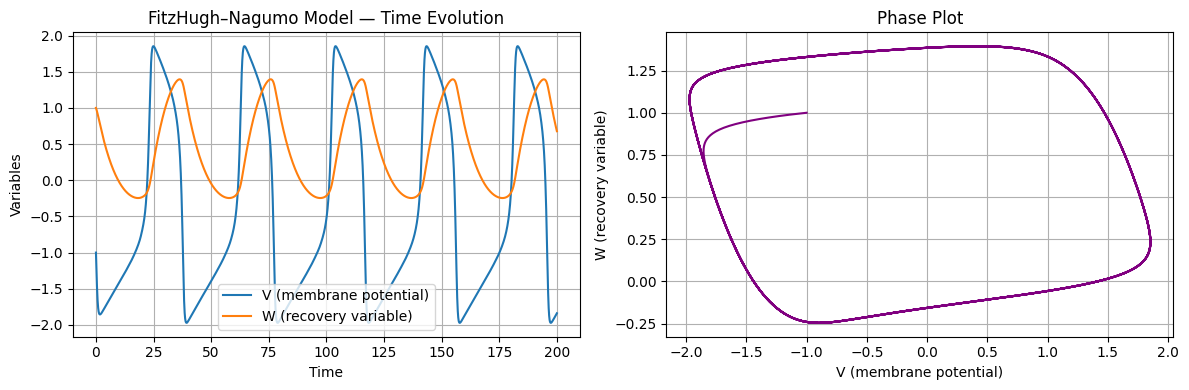

In [17]:
# --- Plot results ---

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Timeline
axs[0].plot(t, V, label="V (membrane potential)")
axs[0].plot(t, W, label="W (recovery variable)")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Variables")
axs[0].set_title("FitzHugh–Nagumo Model — Time Evolution")
axs[0].legend()
axs[0].grid(True)

# Phase plot
axs[1].plot(V, W, color='purple')
axs[1].set_xlabel("V (membrane potential)")
axs[1].set_ylabel("W (recovery variable)")
axs[1].set_title("Phase Plot")
axs[1].grid(True)

plt.tight_layout()
plt.show()

b)	Download the first 10s of the {sig}nals raw/a1t09 and raw/2t01 from the [Squid Giant Axon Membrane Potential (sgamp) database](https://physionet.org/content/sgamp/1.0.0/).

Plot them (membrane voltage and injected current) in Python. What is the main, visible difference between the 2 recordings?


In [18]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def load_first_10s(record_name, path="raw", fs=125000):
    # read record (all signals)
    rec = wfdb.rdsamp(f"{path}/{record_name}")
    signals = rec[0]  # shape (nsamples, n_signals)
    # take first 10 seconds
    n10 = 10 * fs
    signals10 = signals[:n10, :]
    # scale channels:
    # channel 0 (index 0) = membrane potential: multiply by 0.1 to get V
    V = signals10[:, 0] * 0.1
    # channel 1 (index 1) = stimulus current: multiply by 5 to get µA/cm2
    I = signals10[:, 1] * 5.0
    t = np.arange(len(V)) / fs
    return t, V, I

In [20]:
path = 'Data/squid-giant-axon-membrane-potential-1.0.0/raw'

# Load the two records
t1, V1, I1 = load_first_10s("a1t09", path)
t2, V2, I2 = load_first_10s("a2t01", path)

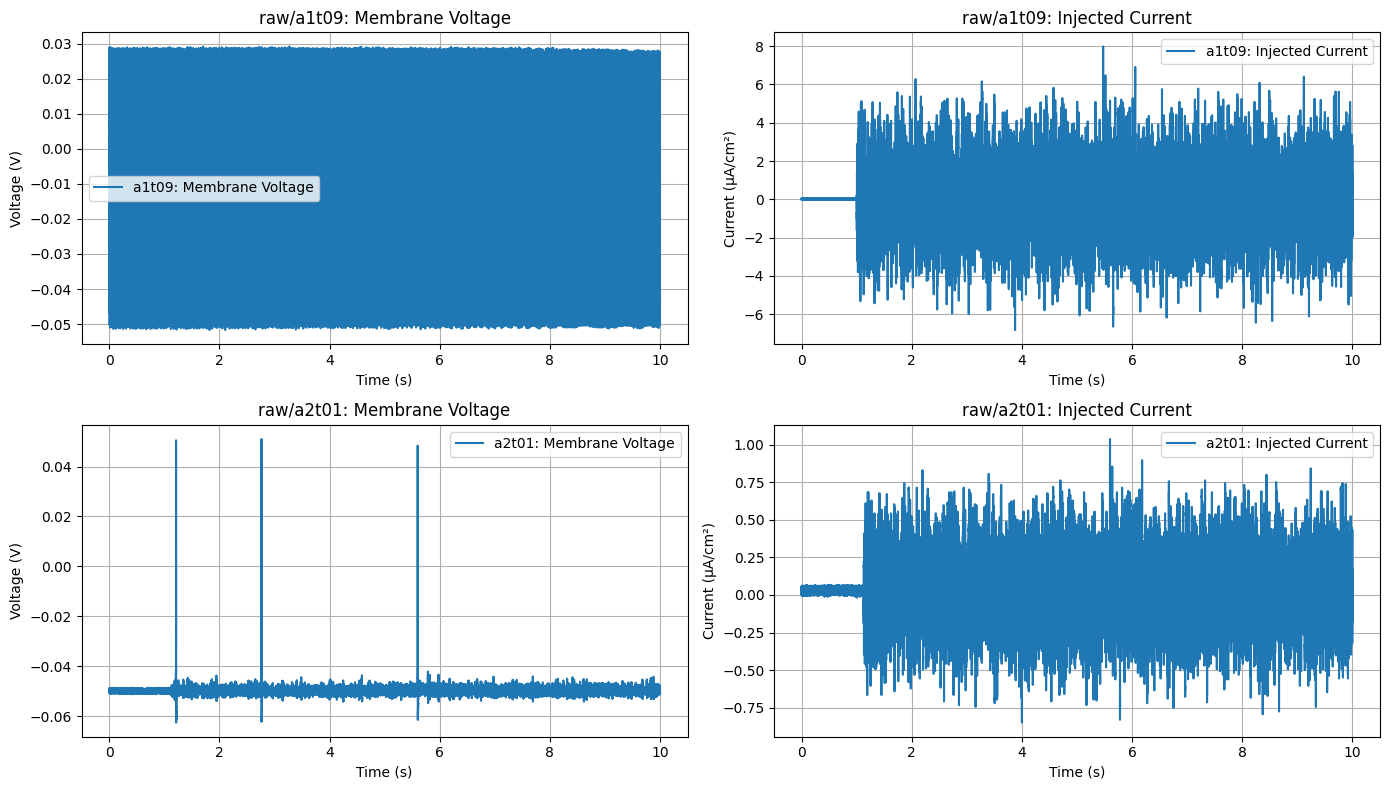

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# a1t09: Membrane Voltage
axs[0, 0].plot(t1, V1, label='a1t09: Membrane Voltage')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Voltage (V)')
axs[0, 0].set_title('raw/a1t09: Membrane Voltage')
axs[0, 0].legend()
axs[0, 0].grid(True)

# a1t09: Injected Current
axs[0, 1].plot(t1, I1, label='a1t09: Injected Current')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Current (µA/cm²)')
axs[0, 1].set_title('raw/a1t09: Injected Current')
axs[0, 1].legend()
axs[0, 1].grid(True)

# a2t01: Membrane Voltage
axs[1, 0].plot(t2, V2, label='a2t01: Membrane Voltage')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Voltage (V)')
axs[1, 0].set_title('raw/a2t01: Membrane Voltage')
axs[1, 0].legend()
axs[1, 0].grid(True)

# a2t01: Injected Current
axs[1, 1].plot(t2, I2, label='a2t01: Injected Current')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('Current (µA/cm²)')
axs[1, 1].set_title('raw/a2t01: Injected Current')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

The main difference we can see is that in a2t01 we can clearly see action potentials but in the other we can't.

c)	Try to simulate this difference with your Fitzhug-Nagumo model. Show your results, and explain, which model did better.

## TASK 4
(3 point)

The following differential equation is given, where x is the input and y is the output:

$$
\ddot{y} + 2*zeta*w_0*\dot{y} + w_0^2y = G\ddot{x}
$$

In the case of discrete systems the derivative will not be the tangential of the curve, but the steepness of the
line connecting the discrete points (difference of the values divided by the time-difference, T).

For a discrete function $z_n$, the approximations for first and second derivatives are:

1. **First-Order Difference:**

   The first derivative $\dot{z_n}$ is:

   $$
   \dot{z_n} = \frac{z_{n+1} - z_{n-1}}{2T}
   $$

2. **Second-Order Difference:**

   The second derivative $\ddot{z_n}$ is:

   $$
   \ddot{z_n} = \frac{\frac{z_{n+1} - z_n}{T} - \frac{z_n - z_{n-1}}{T}}{T}
   $$

   Simplifying, this becomes:

   $$
   \ddot{z_n} = \frac{z_{n+1} - 2z_n + z_{n-1}}{T^2}
   $$


a, Substitute these formulas into the equation above, and multiply it by $T^2$.

b, Write the difference equation in the form of polynomials, such that:

$$
a \cdot Y = b \cdot X
$$

where:
- $a$ and $b$ are row vectors of coefficients.
- $Y$ and $X$ are column vectors defined as follows:

  - $Y = \begin{bmatrix}
    y_{n+1} \\
    y_n \\
    y_{n-1}
  \end{bmatrix}$

  - $X = \begin{bmatrix}
    x_{n+1} \\
    x_n \\
    x_{n-1}
  \end{bmatrix}$

***What is a transfer function of this system?***

$$
\ddot{y} + 2*zeta*w_0*\dot{y} + w_0^2y = G\ddot{x}
$$

Substitutions

$$
\frac{z_{n+1} - 2z_n + z_{n-1}}{T^2} + 2*zeta*w_0*\frac{z_{n+1} - z_{n-1}}{2T} + w_0^2y = G\ddot{x}
$$

Multiply with $T^2$

$$
(z_{n+1} - 2z_n + z_{n-1}) + 2*zeta*w_0*(z_{n+1} - z_{n-1}) + w_0^2yT^2 = G\ddot{x}T^2
$$

c) 	In **SkyPy** the command *y = lfilter(b_coeff,a_coeff,x)* can solve you this difference equation.  Our input,  x will be a step function.
Complete  the following snippet of code with the right a and b. What biomedical signal does this curve resemble?

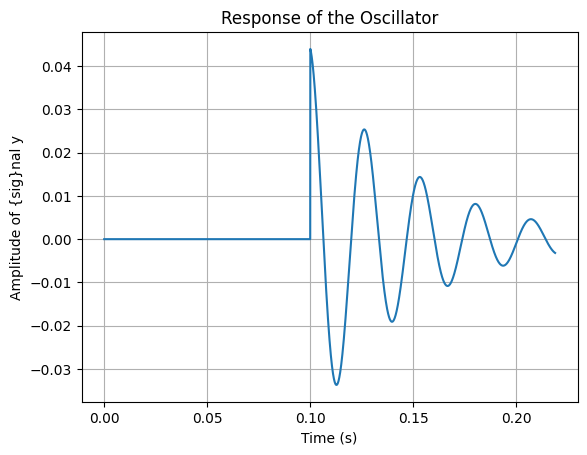

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Parameters
fs = 16e3  # Sampling frequency in Hz
f0 = 100   # Resonant frequency
w0 = 0.745 * np.pi * f0  # Resonant angular frequency (b)
zeta = 0.09    # Damping factor (a)
G = 0.044      # Gain (c)
T = 1 / fs # Sampling period in s
t = np.linspace(0, 3501 / fs, 3501) # Time of observation
tau = 100e-3 # Time at which step occurs

# Input
x = np.double(t > tau)  # Step input

# Transfer function coefficients
a_coeff = [
    1,
    -(2 - (w0**2) * (T**2)) / (1 + zeta * w0 * T),
    (1 - zeta * w0 * T) / (1 + zeta * w0 * T)
]

b_coeff = [
    G / (1 + zeta * w0 * T),
    -2 * G / (1 + zeta * w0 * T),
    G / (1 + zeta * w0 * T)
]

# Apply filter
y = lfilter(b_coeff, a_coeff, x)

# Plot the response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude of {sig}nal y')
plt.title('Response of the Oscillator')
plt.grid(True)
plt.show()

In signal.mat you can find such a signal (structure field signal) and the relating sampling frequency (fs). Find parameters a,b,c and \tau that return a waveform that best matches this signal. You should get a normalised cross-correlation (NXC) of at least 0.6 between the two.

Use the following code snippet to help you:

0.6041313541676144


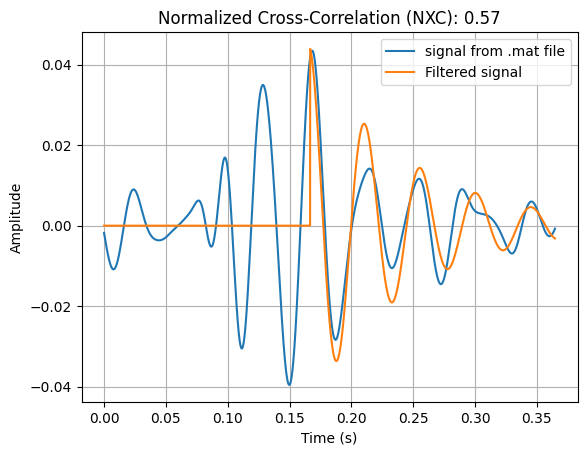

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import norm

# Load the .mat file
mat_data = loadmat(os.path.join('Data', 'signal.mat'))
fs_hrt = mat_data['fs'][0, 0]  # Sampling frequency
y_hrt = mat_data['signal'].flatten()  # signal

# Time vector for the loaded signal
t_hrt = np.linspace(0, len(y_hrt) / fs_hrt, len(y_hrt))

# Assuming `y` is defined earlier in your script
# You need to replace this with the actual signal or computation you used to generate `y`
# For demonstration, I'm creating a dummy `y` signal
# Replace this with your actual `y` signal
# y = np.zeros_like(t_hrt)  # Example placeholder; replace with actual data

# Calculate normalized cross-correlation (NXC)
print(norm(y))
NXC = norm(np.sum(y * y_hrt)) / (norm(y) * norm(y_hrt))

# Plot the signals
plt.figure()
plt.plot(t_hrt, y_hrt, label='signal from .mat file')
plt.plot(np.linspace(0, len(y) / fs_hrt, len(y)), y, label='Filtered signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Normalized Cross-Correlation (NXC): {NXC:.2f}')
plt.legend()
plt.grid(True)
plt.show()


Paste below the figure you get, and the parameters you used to generate it. Comment on the parameters you get, and what type of oscillator these define. You are also encouraged to upload an image of the obtained signal and correlation to the forum, so you can help each other, to find the best result.